# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:17:13.164139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:17:17.544062
2025-04-15 00:17:17.544062


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:17:10"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

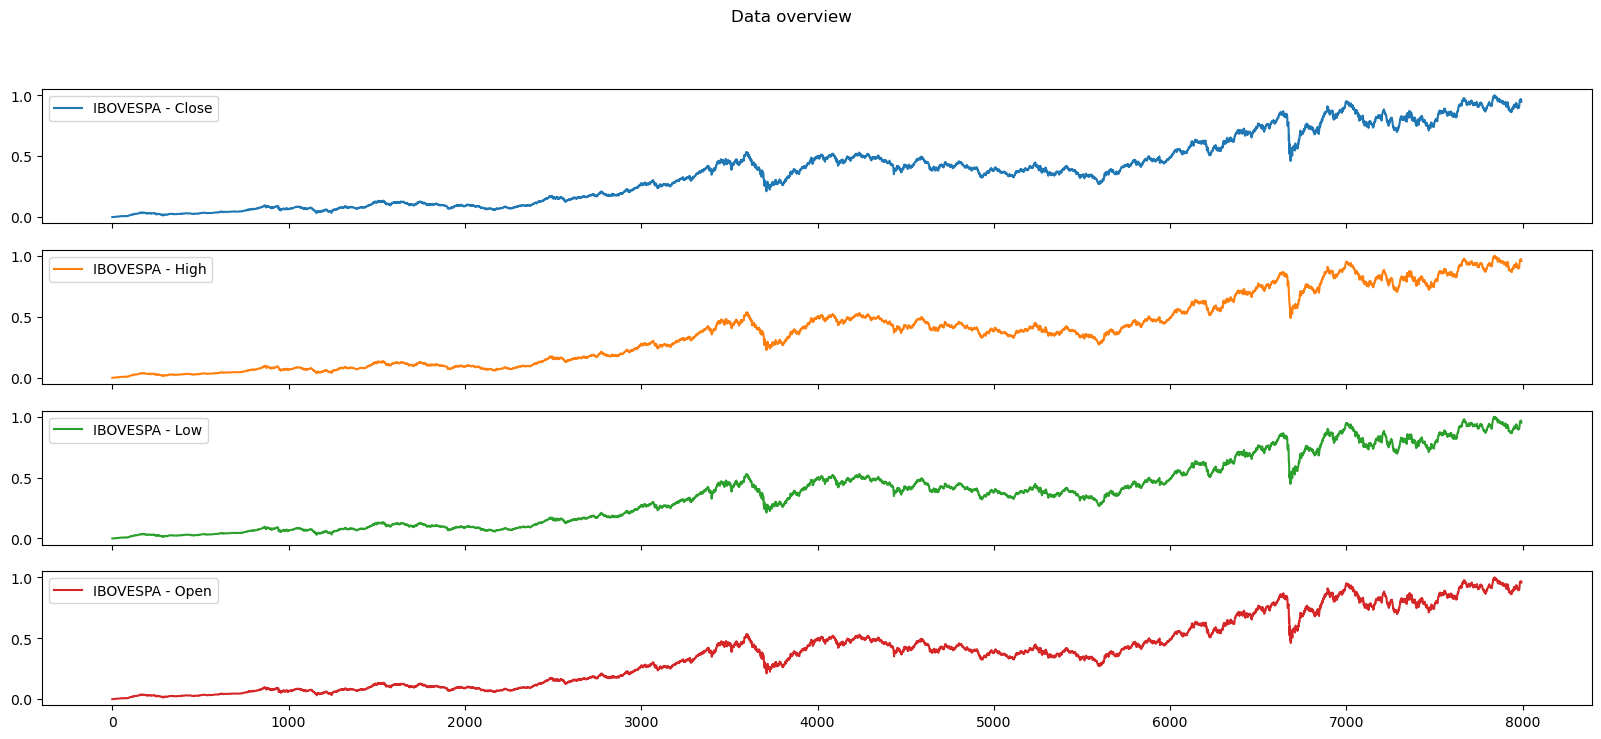

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

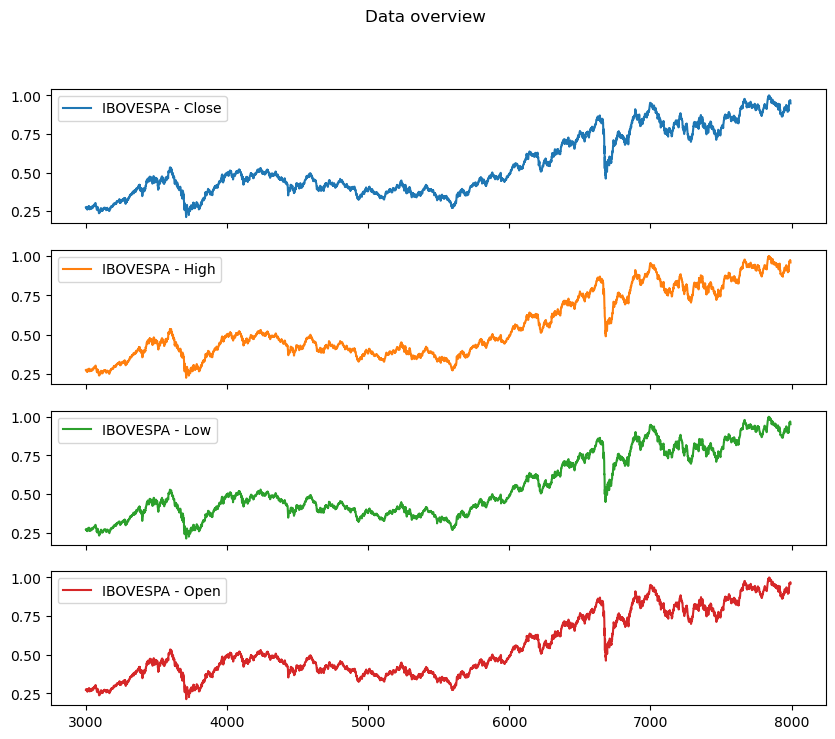

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

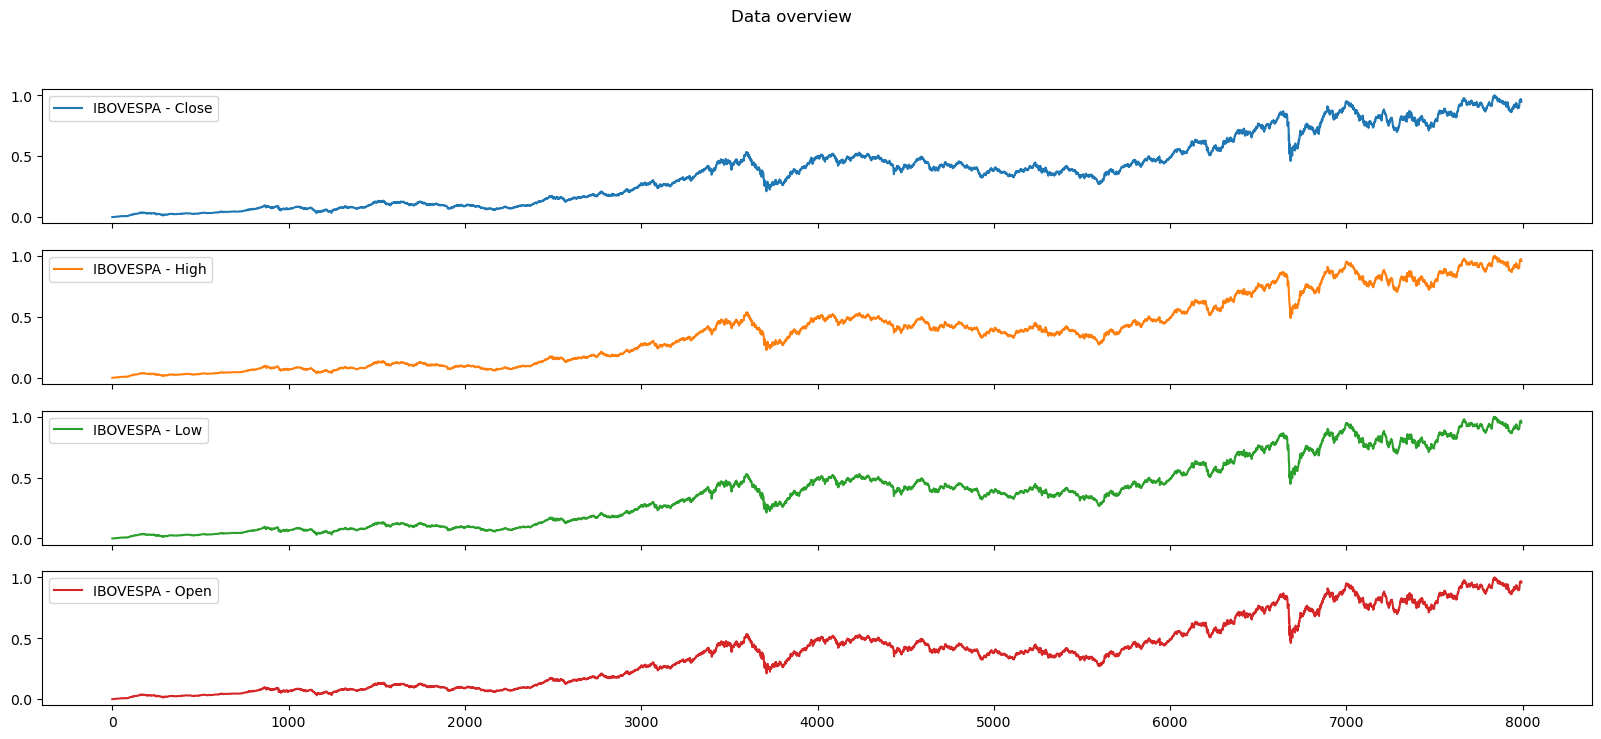

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

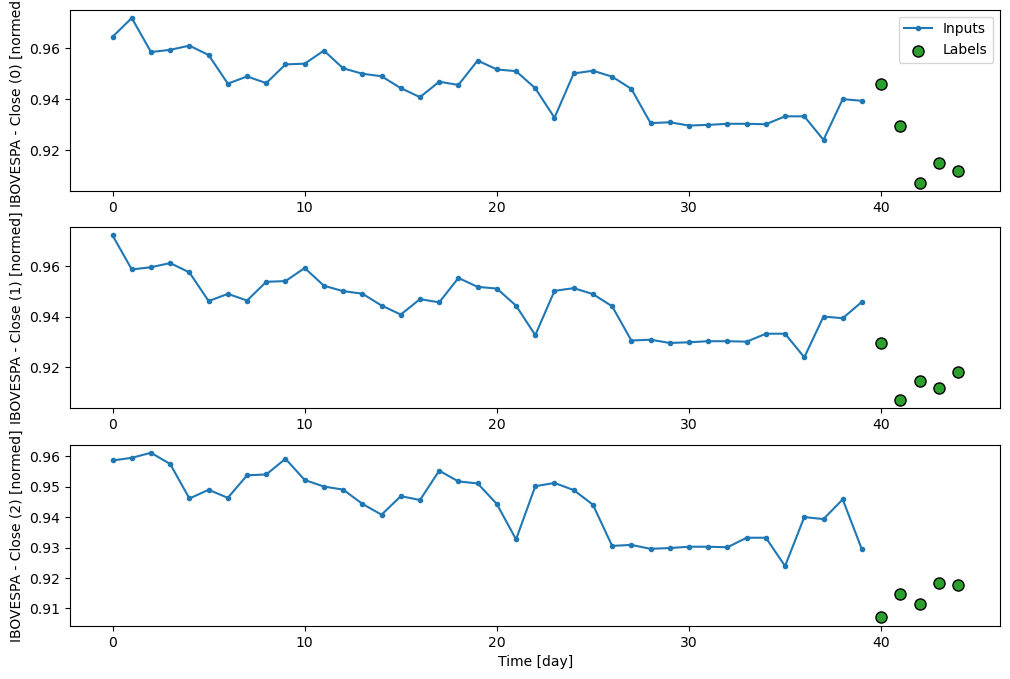

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:22 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 73.8699 - mean_squared_error: 5.8325e-05 - root_mean_squared_error: 0.0075  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 63.0298 - mean_squared_error: 6.5690e-05 - root_mean_squared_error: 0.0080

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 56.4185 - mean_squared_error: 6.8825e-05 - root_mean_squared_error: 0.0082

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 51.8918 - mean_squared_error: 6.8587e-05 - root_mean_squared_error: 0.0082

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 48.0604 - mean_squared_error: 6.6340e-05 - root_mean_squared_error: 0.0081

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 45.0075 - mean_squared_error: 6.4061e-05 - root_mean_squared_error: 0.0080

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 42.5365 - mean_squared_error: 6.1928e-05 - root_mean_squared_error: 0.0078

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 40.4427 - mean_squared_error: 5.9974e-05 - root_mean_squared_error: 0.0077

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 38.5943 - mean_squared_error: 5.8080e-05 - root_mean_squared_error: 0.0076

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.9528 - mean_squared_error: 5.6287e-05 - root_mean_squared_error: 0.0074

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 35.5042 - mean_squared_error: 5.4845e-05 - root_mean_squared_error: 0.0073

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 34.2963 - mean_squared_error: 5.4845e-05 - root_mean_squared_error: 0.0073

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 33.2530 - mean_squared_error: 5.6102e-05 - root_mean_squared_error: 0.0074

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.3519 - mean_squared_error: 5.8243e-05 - root_mean_squared_error: 0.0076

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 31.5680 - mean_squared_error: 6.0789e-05 - root_mean_squared_error: 0.0077

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 30.8616 - mean_squared_error: 6.3484e-05 - root_mean_squared_error: 0.0079

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 30.2360 - mean_squared_error: 6.6275e-05 - root_mean_squared_error: 0.0080

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 29.7642 - mean_squared_error: 7.0265e-05 - root_mean_squared_error: 0.0082

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.3470 - mean_squared_error: 7.4273e-05 - root_mean_squared_error: 0.0084

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.0403 - mean_squared_error: 8.1376e-05 - root_mean_squared_error: 0.0087

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.7825 - mean_squared_error: 8.8985e-05 - root_mean_squared_error: 0.0091

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.5236 - mean_squared_error: 9.5712e-05 - root_mean_squared_error: 0.0093

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.2868 - mean_squared_error: 1.0344e-04 - root_mean_squared_error: 0.0097

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.0437 - mean_squared_error: 1.1028e-04 - root_mean_squared_error: 0.0099

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.7973 - mean_squared_error: 1.1640e-04 - root_mean_squared_error: 0.0102

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 27.5722 - mean_squared_error: 1.2268e-04 - root_mean_squared_error: 0.0104

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 27.3459 - mean_squared_error: 1.2833e-04 - root_mean_squared_error: 0.0107

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 27.1131 - mean_squared_error: 1.3326e-04 - root_mean_squared_error: 0.0109

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 26.8845 - mean_squared_error: 1.3771e-04 - root_mean_squared_error: 0.0110

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 26.6633 - mean_squared_error: 1.4178e-04 - root_mean_squared_error: 0.0112

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 26.4489 - mean_squared_error: 1.4551e-04 - root_mean_squared_error: 0.0114

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 26.2407 - mean_squared_error: 1.4892e-04 - root_mean_squared_error: 0.0115

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.0588 - mean_squared_error: 1.5243e-04 - root_mean_squared_error: 0.0117

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 25.8874 - mean_squared_error: 1.5572e-04 - root_mean_squared_error: 0.0118

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 25.7166 - mean_squared_error: 1.5870e-04 - root_mean_squared_error: 0.0119

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 25.5601 - mean_squared_error: 1.6180e-04 - root_mean_squared_error: 0.0120

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 25.4213 - mean_squared_error: 1.6561e-04 - root_mean_squared_error: 0.0122

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 25.3029 - mean_squared_error: 1.7141e-04 - root_mean_squared_error: 0.0124

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 25.1962 - mean_squared_error: 1.7828e-04 - root_mean_squared_error: 0.0126

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.0866 - mean_squared_error: 1.8471e-04 - root_mean_squared_error: 0.0128

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 24.9721 - mean_squared_error: 1.9059e-04 - root_mean_squared_error: 0.0130

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 24.8545 - mean_squared_error: 1.9602e-04 - root_mean_squared_error: 0.0132

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 24.7350 - mean_squared_error: 2.0109e-04 - root_mean_squared_error: 0.0133

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 24.6168 - mean_squared_error: 2.0598e-04 - root_mean_squared_error: 0.0135

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 24.4998 - mean_squared_error: 2.1081e-04 - root_mean_squared_error: 0.0137

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 24.3892 - mean_squared_error: 2.1669e-04 - root_mean_squared_error: 0.0138

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 24.2849 - mean_squared_error: 2.2401e-04 - root_mean_squared_error: 0.0140

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 24.1805 - mean_squared_error: 2.3121e-04 - root_mean_squared_error: 0.0142

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 24.0762 - mean_squared_error: 2.3822e-04 - root_mean_squared_error: 0.0144

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 23.9713 - mean_squared_error: 2.4495e-04 - root_mean_squared_error: 0.0146

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 23.8656 - mean_squared_error: 2.5138e-04 - root_mean_squared_error: 0.0148

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 23.7590 - mean_squared_error: 2.5759e-04 - root_mean_squared_error: 0.0150

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 23.6525 - mean_squared_error: 2.6379e-04 - root_mean_squared_error: 0.0152

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 23.5461 - mean_squared_error: 2.6994e-04 - root_mean_squared_error: 0.0153

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 23.4392 - mean_squared_error: 2.7591e-04 - root_mean_squared_error: 0.0155

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 23.3327 - mean_squared_error: 2.8196e-04 - root_mean_squared_error: 0.0157

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 23.2328 - mean_squared_error: 2.9043e-04 - root_mean_squared_error: 0.0159

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 23.1417 - mean_squared_error: 3.0142e-04 - root_mean_squared_error: 0.0161

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 23.0965 - mean_squared_error: 3.0681e-04 - root_mean_squared_error: 0.0163

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 23.0092 - mean_squared_error: 3.1867e-04 - root_mean_squared_error: 0.0165

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 22.9293 - mean_squared_error: 3.3484e-04 - root_mean_squared_error: 0.0168

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 22.8581 - mean_squared_error: 3.5972e-04 - root_mean_squared_error: 0.0173

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 22.7947 - mean_squared_error: 3.9359e-04 - root_mean_squared_error: 0.0178

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 22.7364 - mean_squared_error: 4.3195e-04 - root_mean_squared_error: 0.0183

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 22.6782 - mean_squared_error: 4.6941e-04 - root_mean_squared_error: 0.0189

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 22.6197 - mean_squared_error: 5.0577e-04 - root_mean_squared_error: 0.0194

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 22.5597 - mean_squared_error: 5.4054e-04 - root_mean_squared_error: 0.0199

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 22.4982 - mean_squared_error: 5.7376e-04 - root_mean_squared_error: 0.0204

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 22.4360 - mean_squared_error: 6.0570e-04 - root_mean_squared_error: 0.0209

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 22.3737 - mean_squared_error: 6.3648e-04 - root_mean_squared_error: 0.0213

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 22.3114 - mean_squared_error: 6.6635e-04 - root_mean_squared_error: 0.0218

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 22.2501 - mean_squared_error: 6.9582e-04 - root_mean_squared_error: 0.0222

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 22.1877 - mean_squared_error: 7.2404e-04 - root_mean_squared_error: 0.0226

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 22.1242 - mean_squared_error: 7.5103e-04 - root_mean_squared_error: 0.0230

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 22.0599 - mean_squared_error: 7.7685e-04 - root_mean_squared_error: 0.0234

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 21.9951 - mean_squared_error: 8.0162e-04 - root_mean_squared_error: 0.0238

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 21.9304 - mean_squared_error: 8.2547e-04 - root_mean_squared_error: 0.0241

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 21.8658 - mean_squared_error: 8.4844e-04 - root_mean_squared_error: 0.0245

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 21.8014 - mean_squared_error: 8.7061e-04 - root_mean_squared_error: 0.0248

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 21.7369 - mean_squared_error: 8.9190e-04 - root_mean_squared_error: 0.0251

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 21.6729 - mean_squared_error: 9.1247e-04 - root_mean_squared_error: 0.0254

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 21.6090 - mean_squared_error: 9.3234e-04 - root_mean_squared_error: 0.0257

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 21.5459 - mean_squared_error: 9.5168e-04 - root_mean_squared_error: 0.0260

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 21.4840 - mean_squared_error: 9.7059e-04 - root_mean_squared_error: 0.0263

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 21.4221 - mean_squared_error: 9.8879e-04 - root_mean_squared_error: 0.0266

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 21.3607 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0269    

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 21.2995 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0271

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 21.2390 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 21.1806 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 21.1255 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 21.0735 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0282

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 21.0247 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 20.9781 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 20.9333 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0291

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 20.8889 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 20.8443 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 20.8004 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 20.7566 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0303

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 20.7133 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 20.6712 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 20.6300 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 20.5892 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0315

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 20.5478 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 20.5070 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0321

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 20.4685 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 20.4297 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 20.4102 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 20.3909 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 20.3720 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 20.3532 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 20.3164 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 20.2799 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 20.2438 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 20.2082 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 20.1727 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 20.1371 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 20.1018 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 20.0667 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 20.0315 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 19.9963 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 19.9614 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368 - val_loss: 0.0199 - val_mean_absolute_error: 0.0199 - val_mean_absolute_percentage_error: 2.1064 - val_mean_squared_error: 6.9289e-04 - val_root_mean_squared_error: 0.0263 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.5133 - mean_absolute_error: 0.5133 - mean_absolute_percentage_error: 6894.6855 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.5134

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5060 - mean_absolute_error: 0.5060 - mean_absolute_percentage_error: 5719.1055 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.5062 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4927 - mean_absolute_error: 0.4927 - mean_absolute_percentage_error: 4818.0757 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4934

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5170 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 4377.9922 - mean_squared_error: 0.3523 - root_mean_squared_error: 0.5618

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5455 - mean_absolute_error: 0.5455 - mean_absolute_percentage_error: 4140.2393 - mean_squared_error: 0.4721 - root_mean_squared_error: 0.6467

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5538 - mean_absolute_error: 0.5538 - mean_absolute_percentage_error: 3927.1587 - mean_squared_error: 0.5225 - root_mean_squared_error: 0.6865

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5500 - mean_absolute_error: 0.5500 - mean_absolute_percentage_error: 3724.0879 - mean_squared_error: 0.5400 - root_mean_squared_error: 0.7036

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_absolute_percentage_error: 3533.7798 - mean_squared_error: 0.5414 - root_mean_squared_error: 0.7087

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5252 - mean_absolute_error: 0.5252 - mean_absolute_percentage_error: 3357.1565 - mean_squared_error: 0.5346 - root_mean_squared_error: 0.7071

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5096 - mean_absolute_error: 0.5096 - mean_absolute_percentage_error: 3195.7607 - mean_squared_error: 0.5237 - root_mean_squared_error: 0.7018

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4940 - mean_absolute_error: 0.4940 - mean_absolute_percentage_error: 3049.3042 - mean_squared_error: 0.5110 - root_mean_squared_error: 0.6944

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4788 - mean_absolute_error: 0.4788 - mean_absolute_percentage_error: 2916.1836 - mean_squared_error: 0.4975 - root_mean_squared_error: 0.6859

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - mean_absolute_percentage_error: 2794.6545 - mean_squared_error: 0.4838 - root_mean_squared_error: 0.6767

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 2683.4561 - mean_squared_error: 0.4703 - root_mean_squared_error: 0.6673

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4367 - mean_absolute_error: 0.4367 - mean_absolute_percentage_error: 2581.4644 - mean_squared_error: 0.4572 - root_mean_squared_error: 0.6578

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4240 - mean_absolute_error: 0.4240 - mean_absolute_percentage_error: 2487.6501 - mean_squared_error: 0.4446 - root_mean_squared_error: 0.6484

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 2401.0693 - mean_squared_error: 0.4326 - root_mean_squared_error: 0.6392

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4008 - mean_absolute_error: 0.4008 - mean_absolute_percentage_error: 2320.9385 - mean_squared_error: 0.4211 - root_mean_squared_error: 0.6302

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 2246.5896 - mean_squared_error: 0.4102 - root_mean_squared_error: 0.6214

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3800 - mean_absolute_error: 0.3800 - mean_absolute_percentage_error: 2177.4131 - mean_squared_error: 0.3998 - root_mean_squared_error: 0.6129

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3705 - mean_absolute_error: 0.3705 - mean_absolute_percentage_error: 2112.8572 - mean_squared_error: 0.3900 - root_mean_squared_error: 0.6047

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3615 - mean_absolute_error: 0.3615 - mean_absolute_percentage_error: 2052.4673 - mean_squared_error: 0.3806 - root_mean_squared_error: 0.5968

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3571 - mean_absolute_error: 0.3571 - mean_absolute_percentage_error: 2023.7064 - mean_squared_error: 0.3761 - root_mean_squared_error: 0.5929

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 1968.8270 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5853

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1917.2002 - mean_squared_error: 0.3591 - root_mean_squared_error: 0.5781

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1868.5389 - mean_squared_error: 0.3512 - root_mean_squared_error: 0.5710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1822.5927 - mean_squared_error: 0.3437 - root_mean_squared_error: 0.5642

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1779.1304 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5576

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1737.9493 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5513

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1698.8688 - mean_squared_error: 0.3230 - root_mean_squared_error: 0.5451

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1661.7274 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5392

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1626.3751 - mean_squared_error: 0.3107 - root_mean_squared_error: 0.5334

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1592.6848 - mean_squared_error: 0.3050 - root_mean_squared_error: 0.5279

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1560.5411 - mean_squared_error: 0.2994 - root_mean_squared_error: 0.5225

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1529.8391 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5172

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1500.4791 - mean_squared_error: 0.2890 - root_mean_squared_error: 0.5121

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1472.3690 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5072

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1445.4263 - mean_squared_error: 0.2793 - root_mean_squared_error: 0.5024

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1419.5759 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.4978

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1394.7500 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4932

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1370.8864 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4889

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 1347.9279 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4846

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1325.8212 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4804

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1304.5173 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4764

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1283.9722 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4724

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1264.1442 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4686

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1244.9955 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4648

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1226.4890 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4611

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1208.5919 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4576

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1191.2727 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4541

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1174.5027 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4507

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1158.2549 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4473

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1142.5046 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4441

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 1127.2294 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4409

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 1112.4064 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4378

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1098.0153 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4348

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 1084.0364 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4318

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 1070.4515 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4289

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 1057.2449 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4260

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 1044.3993 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4232

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 1031.8997 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4205

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 1019.7313 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4178

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 1007.8806 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4152

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 996.3344 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4126 

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 985.0808 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4101

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 974.1086 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4076

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 963.4070 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4052

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 952.9658 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4028

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 942.7749 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4004

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 932.8250 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.3981

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 923.1075 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3959

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 913.6141 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.3936

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 904.3371 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3914

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 895.2700 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3893

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 886.4042 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3872

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 877.7331 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3851

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 869.2496 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3831

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 860.9484 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3811

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 852.8228 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3791

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 844.8670 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3772

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 837.0754 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3753

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 829.4426 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3734

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 821.9639 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3715

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 814.6352 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3697

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 811.0255 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3688

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 803.9126 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3670

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1558 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 796.9380 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3653

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 790.0972 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3636

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 783.3867 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3618

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1523 - mean_absolute_error: 0.1523 - mean_absolute_percentage_error: 776.8027 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3602

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1512 - mean_absolute_error: 0.1512 - mean_absolute_percentage_error: 770.3416 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3585

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 763.9993 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 757.7730 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3553

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 751.6592 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3537

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 745.6546 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3521

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 739.7567 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3506

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 733.9625 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3491

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 728.2689 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3476

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 722.6736 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3461

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 717.1740 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3447

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 711.7670 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3432

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 706.4504 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3418

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 701.2219 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3404

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 696.0787 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3390

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 691.0190 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3377

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 686.0419 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3363

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 681.1447 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3350

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 676.3246 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3337

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 671.5808 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3324

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 666.9114 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3311

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 662.3143 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3299

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 657.7876 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3286

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 653.3302 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3274

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 648.9401 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3262

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 644.6154 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3250

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 642.4771 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3244

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 638.2480 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3232

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 634.0810 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3221

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 629.9744 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3209

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 625.9267 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3198

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 621.9432 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3187 - val_loss: 0.0170 - val_mean_absolute_error: 0.0170 - val_mean_absolute_percentage_error: 1.8319 - val_mean_squared_error: 4.3542e-04 - val_root_mean_squared_error: 0.0209 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 3370.8838 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2514

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 2767.1062 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2436 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 2300.4878 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2305

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 1973.9869 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2158

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 1761.0148 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2051

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 1596.1793 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1955

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 1465.7346 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 1359.1499 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1800

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 1269.5753 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1735

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1492 - mean_absolute_error: 0.1492 - mean_absolute_percentage_error: 1192.8993 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1678

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 1126.2344 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1626

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 1067.7214 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1579

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 1015.8315 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1536

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 969.3998 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1496 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 927.6099 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1460

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 889.7739 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1426

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 855.3373 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1395

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 823.8580 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1366

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 795.0272 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1339

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 768.4539 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1313

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 743.8828 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1289

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 721.0828 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1267

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 699.8622 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1245

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 680.0477 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1225

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 661.4905 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1206

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 644.0535 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1188

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 627.6335 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1171

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 612.1497 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1155

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 597.5162 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1139

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 583.6622 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1124

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 570.5333 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1110

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 558.0677 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1096

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 546.2235 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1082

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 534.9539 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1070

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 524.2194 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1058

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 513.9781 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1046

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 504.1887 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1034

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 494.8206 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1023

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 485.8438 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1013

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 477.2312 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1003

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 468.9637 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0993

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 461.0157 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0983

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 453.3703 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0974

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 446.0078 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0965

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 438.9155 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0956

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 432.0752 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0948

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 425.4752 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0940

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 419.1010 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0932

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 412.9415 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0924

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 406.9870 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0916

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 401.2235 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0909

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 395.6422 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0902

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 392.9167 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0899

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 387.5913 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0892

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 382.4271 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0885

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 377.4159 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0879

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 372.5506 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0873

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 367.8249 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0866

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 363.2343 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0861

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 358.7723 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0855

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 354.4323 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0849

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 350.2094 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0843

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 346.0982 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0838

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 342.0944 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0833

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 338.1932 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0828

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 334.3910 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0822

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 330.6833 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0817

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 327.0667 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0813

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 323.5376 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0808

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 320.0929 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0803

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 316.7298 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0798

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 313.4452 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0794

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 310.2363 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0789

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 307.1012 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0785

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 304.0363 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0781

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 301.0395 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0777

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 298.1082 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0772

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 295.2405 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0768

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 292.4340 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0764

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 289.6865 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0760

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 286.9962 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0757

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 284.3612 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0753

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 281.7799 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0749

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 280.5089 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0747

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 278.0051 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0744

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 275.5509 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0740

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 273.1448 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0737

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 270.7854 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0733

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 268.4713 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0730

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 266.2015 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0726

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 263.9742 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0723

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 261.7884 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0720

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 259.6427 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0716

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 257.5360 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0713

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 255.4672 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0710

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 253.4352 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0707

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 251.4390 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0704

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 249.4776 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0701

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 247.5502 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0698

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 245.6559 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0695

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 243.7940 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0692

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 241.9634 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0690

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 240.1633 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0687

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 238.3929 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0684

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 236.6515 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0681

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 234.9393 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0679

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 233.2551 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0676

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 231.5977 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0674

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 229.9669 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0672

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 228.3621 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0669

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 226.7824 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0667

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 225.2273 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0665

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 223.6966 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0663

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 222.1892 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0661

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 220.7044 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0659

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 219.2421 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0657

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 217.8016 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0655

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 216.3822 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0653

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 214.9834 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0651

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 213.6052 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0649

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 212.9247 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0648 - val_loss: 0.0391 - val_mean_absolute_error: 0.0391 - val_mean_absolute_percentage_error: 4.1380 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0427 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1546.0011 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1154

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1236.2046 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1076 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 1006.6685 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0982

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 860.8359 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0913 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 771.4772 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0874

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 705.1793 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 651.0408 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0812

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 606.8432 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0785

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 569.1472 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0761

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 536.8155 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0739

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 508.5668 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0719

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 483.6212 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0701

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 461.4426 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0684

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 441.4733 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0668

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 423.4621 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0654

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 407.0886 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0640

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 392.1313 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0628

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 378.4132 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0616

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 365.8098 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 354.1749 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0595

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 343.3727 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0585

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 333.3146 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 323.9178 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 315.1118 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 306.8427 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0551

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 299.0541 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0543

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 291.7075 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 284.7635 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0529

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 278.1899 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 271.9560 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 266.0352 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 260.4030 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 255.0389 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 249.9240 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 245.0394 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 240.3689 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 235.8986 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 231.6147 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 227.5047 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 223.5597 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 219.7687 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 216.1225 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 212.6115 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 209.2295 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 205.9684 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 202.8222 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 199.7838 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 196.8474 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 194.0092 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 191.2627 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 188.6046 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 186.0300 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 184.7726 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 182.3148 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 179.9303 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 177.6161 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 175.3685 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 173.1850 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 171.0658 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 169.0058 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 167.0032 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 165.0569 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 163.1645 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 161.3229 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 159.5285 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 157.7798 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 156.0750 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 154.4120 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 152.7889 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 151.2039 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 149.6560 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 148.1446 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 146.6682 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 145.2251 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 143.8140 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 142.4337 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 141.0831 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 139.7614 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 138.4678 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 137.2013 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 135.9608 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 134.7454 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 133.5545 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 132.9682 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 131.8138 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 130.6819 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 129.5718 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 128.4830 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 127.4148 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 126.3674 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 125.3399 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 124.3316 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 123.3415 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 122.3694 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 121.4148 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 120.4770 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 119.5556 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 118.6504 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 117.7609 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 116.8865 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 116.0268 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 115.1815 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 114.3500 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 113.5320 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 112.7271 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 111.9364 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 111.1590 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 110.3939 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 109.6412 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 108.9008 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 108.1723 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 107.4551 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 106.7490 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 106.0537 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 105.7100 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 105.3688 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 105.0301 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 104.6940 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 104.0294 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 103.3745 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 102.7289 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 102.0927 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 101.7786 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342 - val_loss: 0.0190 - val_mean_absolute_error: 0.0190 - val_mean_absolute_percentage_error: 2.0664 - val_mean_squared_error: 5.0544e-04 - val_root_mean_squared_error: 0.0225 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 3210.2432 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2390

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 2663.6091 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2357 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 2246.2227 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2304

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1968.6941 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2233

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1768.4919 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2149

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 1607.9451 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.2062

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 1480.9985 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1985

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 1378.3977 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1917

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 1291.3313 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1856

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 1216.0123 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1799

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 1150.6481 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1748

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 1093.1470 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1701

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 1041.8083 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1658

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 995.6584 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1618 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 953.9553 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1580

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 916.0358 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1546

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 881.4332 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1513

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 849.6904 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1483

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 820.5240 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1454

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 793.5786 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1428

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 768.6157 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1402

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 756.8066 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1390

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 734.3880 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1367

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 713.4354 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1345

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 693.7935 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1324

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 675.3403 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1304

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 657.9673 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1285

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 641.5797 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1266

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 626.0905 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1249

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 611.4238 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1232

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 597.5168 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1216

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 584.3116 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1201

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 571.7517 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1186

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 559.7947 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1172

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 548.3961 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1158

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 537.5199 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1145

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 527.1224 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1132

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 517.1711 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1120

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 507.6376 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1108

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 498.4946 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1097

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 489.7194 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1085

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 481.2898 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1075

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 473.1825 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1064

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 465.3802 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1054

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 457.8634 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1044

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 450.6175 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1035

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 443.6256 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1026

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 436.8743 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1017

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 430.3509 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1008

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 424.0440 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0999

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 417.9422 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0991

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 412.0348 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0983

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 406.3123 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0975

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 400.7658 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0968

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 395.3873 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0960

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 390.1689 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0953

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 385.1028 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0946

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 380.1827 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0939

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 375.4032 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0932

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 370.7578 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0926

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 366.2400 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0919

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 361.8440 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0913

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 357.5648 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0907

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 353.3974 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0901

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 349.3375 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0895

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 345.3807 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0889

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 341.5229 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0883

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 337.7603 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0878

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 334.0893 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0872

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 330.5066 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0867

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 327.0090 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0862

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 323.5936 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0857

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 320.2572 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0852

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 316.9973 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0847

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 313.8109 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0842

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 310.6953 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0837

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 307.6480 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0832

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 304.6671 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0828

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 301.7500 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0823

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 298.8946 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0819

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 296.0989 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0815

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 293.3610 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0810

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 290.6793 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0806

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 288.0521 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0802

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 285.4775 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0798

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 282.9539 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0794

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 280.4796 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0790

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 278.0532 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0786

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 275.6734 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0782

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 273.3387 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0779

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 271.0477 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0775

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 268.7993 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0771

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 266.5921 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0768

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 264.4250 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0764

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 262.2971 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0761

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 260.2070 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0757

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 258.1537 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0754

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 256.1366 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0751

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 254.1545 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0747

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 252.2065 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0744

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 250.2918 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0741

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 248.4093 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0738

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 246.5582 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0735

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 244.7377 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0732

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 242.9471 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0729

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 241.1862 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0726

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 239.4535 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0723

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 237.7485 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0720

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 236.0707 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0718

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 234.4191 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0715

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 232.7933 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0712

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 231.1932 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0710

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 229.6176 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0707

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 228.0659 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0705

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 226.5376 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0703

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 225.0321 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0700

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 223.5489 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0698

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 222.0874 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0696

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 220.6471 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0693

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 219.2296 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0691 - val_loss: 0.0473 - val_mean_absolute_error: 0.0473 - val_mean_absolute_percentage_error: 5.0171 - val_mean_squared_error: 0.0025 - val_root_mean_squared_error: 0.0498 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 652.9508 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 516.1935 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 417.8300 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 358.8964 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 323.2320 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 295.7428 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 274.3772 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 257.3425 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 242.6611 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 230.1832 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 219.2920 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 209.5611 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 200.8539 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 192.9318 - mean_squared_error: 9.7826e-04 - root_mean_squared_error: 0.0307

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 185.7453 - mean_squared_error: 9.4946e-04 - root_mean_squared_error: 0.0302

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 179.2070 - mean_squared_error: 9.2328e-04 - root_mean_squared_error: 0.0297

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 173.1954 - mean_squared_error: 8.9876e-04 - root_mean_squared_error: 0.0293

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 167.6702 - mean_squared_error: 8.7599e-04 - root_mean_squared_error: 0.0289

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 162.5650 - mean_squared_error: 8.5450e-04 - root_mean_squared_error: 0.0285

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 157.8252 - mean_squared_error: 8.3417e-04 - root_mean_squared_error: 0.0282

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 153.4016 - mean_squared_error: 8.1489e-04 - root_mean_squared_error: 0.0278

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 149.2601 - mean_squared_error: 7.9656e-04 - root_mean_squared_error: 0.0275

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 145.3781 - mean_squared_error: 7.7919e-04 - root_mean_squared_error: 0.0271

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.7258 - mean_squared_error: 7.6273e-04 - root_mean_squared_error: 0.0268

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 138.2842 - mean_squared_error: 7.4715e-04 - root_mean_squared_error: 0.0265

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 135.0286 - mean_squared_error: 7.3223e-04 - root_mean_squared_error: 0.0262

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 131.9456 - mean_squared_error: 7.1796e-04 - root_mean_squared_error: 0.0260

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 129.0237 - mean_squared_error: 7.0434e-04 - root_mean_squared_error: 0.0257

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 126.2482 - mean_squared_error: 6.9128e-04 - root_mean_squared_error: 0.0254

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.6092 - mean_squared_error: 6.7877e-04 - root_mean_squared_error: 0.0252

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 121.0978 - mean_squared_error: 6.6677e-04 - root_mean_squared_error: 0.0249

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 118.7036 - mean_squared_error: 6.5526e-04 - root_mean_squared_error: 0.0247

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.4202 - mean_squared_error: 6.4422e-04 - root_mean_squared_error: 0.0245

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 114.2412 - mean_squared_error: 6.3361e-04 - root_mean_squared_error: 0.0242

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.1604 - mean_squared_error: 6.2344e-04 - root_mean_squared_error: 0.0240

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 110.1684 - mean_squared_error: 6.1365e-04 - root_mean_squared_error: 0.0238

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.2585 - mean_squared_error: 6.0421e-04 - root_mean_squared_error: 0.0236

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 106.4242 - mean_squared_error: 5.9510e-04 - root_mean_squared_error: 0.0234

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.6611 - mean_squared_error: 5.8633e-04 - root_mean_squared_error: 0.0232

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 102.9651 - mean_squared_error: 5.7787e-04 - root_mean_squared_error: 0.0230

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.3333 - mean_squared_error: 5.6973e-04 - root_mean_squared_error: 0.0229

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.7605 - mean_squared_error: 5.6186e-04 - root_mean_squared_error: 0.0227 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.2433 - mean_squared_error: 5.5426e-04 - root_mean_squared_error: 0.0225

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.5046 - mean_squared_error: 5.5055e-04 - root_mean_squared_error: 0.0224

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.7787 - mean_squared_error: 5.4690e-04 - root_mean_squared_error: 0.0224

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.3642 - mean_squared_error: 5.3978e-04 - root_mean_squared_error: 0.0222

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.9967 - mean_squared_error: 5.3289e-04 - root_mean_squared_error: 0.0220

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.6742 - mean_squared_error: 5.2623e-04 - root_mean_squared_error: 0.0219

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.3940 - mean_squared_error: 5.1979e-04 - root_mean_squared_error: 0.0217

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.1543 - mean_squared_error: 5.1356e-04 - root_mean_squared_error: 0.0216

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.9529 - mean_squared_error: 5.0752e-04 - root_mean_squared_error: 0.0214

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.7877 - mean_squared_error: 5.0166e-04 - root_mean_squared_error: 0.0213

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.6573 - mean_squared_error: 4.9598e-04 - root_mean_squared_error: 0.0212

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.5597 - mean_squared_error: 4.9047e-04 - root_mean_squared_error: 0.0210

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.4940 - mean_squared_error: 4.8517e-04 - root_mean_squared_error: 0.0209

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.4588 - mean_squared_error: 4.8008e-04 - root_mean_squared_error: 0.0208

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.4525 - mean_squared_error: 4.7519e-04 - root_mean_squared_error: 0.0207

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.4742 - mean_squared_error: 4.7050e-04 - root_mean_squared_error: 0.0206

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.5238 - mean_squared_error: 4.6617e-04 - root_mean_squared_error: 0.0205

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.6001 - mean_squared_error: 4.6212e-04 - root_mean_squared_error: 0.0204

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.7014 - mean_squared_error: 4.5824e-04 - root_mean_squared_error: 0.0203

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.8274 - mean_squared_error: 4.5468e-04 - root_mean_squared_error: 0.0202

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.9767 - mean_squared_error: 4.5142e-04 - root_mean_squared_error: 0.0202

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.1479 - mean_squared_error: 4.4835e-04 - root_mean_squared_error: 0.0201

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.3396 - mean_squared_error: 4.4539e-04 - root_mean_squared_error: 0.0200

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.5521 - mean_squared_error: 4.4276e-04 - root_mean_squared_error: 0.0200

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.7839 - mean_squared_error: 4.4029e-04 - root_mean_squared_error: 0.0199

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.0338 - mean_squared_error: 4.3786e-04 - root_mean_squared_error: 0.0199

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.3012 - mean_squared_error: 4.3549e-04 - root_mean_squared_error: 0.0198

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.5853 - mean_squared_error: 4.3315e-04 - root_mean_squared_error: 0.0198

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.8860 - mean_squared_error: 4.3090e-04 - root_mean_squared_error: 0.0197

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.2024 - mean_squared_error: 4.2870e-04 - root_mean_squared_error: 0.0197

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.5342 - mean_squared_error: 4.2658e-04 - root_mean_squared_error: 0.0197

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 68.8807 - mean_squared_error: 4.2451e-04 - root_mean_squared_error: 0.0196

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.2412 - mean_squared_error: 4.2246e-04 - root_mean_squared_error: 0.0196

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.6152 - mean_squared_error: 4.2043e-04 - root_mean_squared_error: 0.0195

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.0023 - mean_squared_error: 4.1842e-04 - root_mean_squared_error: 0.0195

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 66.4021 - mean_squared_error: 4.1643e-04 - root_mean_squared_error: 0.0194

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 65.8144 - mean_squared_error: 4.1448e-04 - root_mean_squared_error: 0.0194

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 65.2386 - mean_squared_error: 4.1256e-04 - root_mean_squared_error: 0.0194

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 64.6743 - mean_squared_error: 4.1065e-04 - root_mean_squared_error: 0.0193

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 64.1212 - mean_squared_error: 4.0876e-04 - root_mean_squared_error: 0.0193

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 63.8487 - mean_squared_error: 4.0783e-04 - root_mean_squared_error: 0.0193

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 63.3117 - mean_squared_error: 4.0598e-04 - root_mean_squared_error: 0.0192

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 62.7855 - mean_squared_error: 4.0419e-04 - root_mean_squared_error: 0.0192

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 62.2694 - mean_squared_error: 4.0244e-04 - root_mean_squared_error: 0.0191

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 61.7630 - mean_squared_error: 4.0069e-04 - root_mean_squared_error: 0.0191

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 61.2660 - mean_squared_error: 3.9897e-04 - root_mean_squared_error: 0.0191

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 60.7783 - mean_squared_error: 3.9727e-04 - root_mean_squared_error: 0.0190

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 60.2997 - mean_squared_error: 3.9561e-04 - root_mean_squared_error: 0.0190

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 59.8301 - mean_squared_error: 3.9400e-04 - root_mean_squared_error: 0.0190

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 59.3690 - mean_squared_error: 3.9242e-04 - root_mean_squared_error: 0.0189

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 58.9161 - mean_squared_error: 3.9088e-04 - root_mean_squared_error: 0.0189

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 58.4713 - mean_squared_error: 3.8936e-04 - root_mean_squared_error: 0.0189

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 58.0343 - mean_squared_error: 3.8790e-04 - root_mean_squared_error: 0.0188

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 57.6049 - mean_squared_error: 3.8647e-04 - root_mean_squared_error: 0.0188

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 57.1832 - mean_squared_error: 3.8513e-04 - root_mean_squared_error: 0.0188

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 56.7688 - mean_squared_error: 3.8390e-04 - root_mean_squared_error: 0.0187

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 56.3616 - mean_squared_error: 3.8275e-04 - root_mean_squared_error: 0.0187

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 55.9615 - mean_squared_error: 3.8176e-04 - root_mean_squared_error: 0.0187

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 55.5681 - mean_squared_error: 3.8081e-04 - root_mean_squared_error: 0.0187

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 55.1811 - mean_squared_error: 3.7990e-04 - root_mean_squared_error: 0.0187

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 54.8005 - mean_squared_error: 3.7904e-04 - root_mean_squared_error: 0.0187

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 54.4258 - mean_squared_error: 3.7819e-04 - root_mean_squared_error: 0.0186

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 54.0570 - mean_squared_error: 3.7735e-04 - root_mean_squared_error: 0.0186

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 53.6943 - mean_squared_error: 3.7679e-04 - root_mean_squared_error: 0.0186

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 53.3381 - mean_squared_error: 3.7684e-04 - root_mean_squared_error: 0.0186

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 52.9875 - mean_squared_error: 3.7691e-04 - root_mean_squared_error: 0.0186

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 52.6424 - mean_squared_error: 3.7714e-04 - root_mean_squared_error: 0.0186

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 52.3032 - mean_squared_error: 3.7791e-04 - root_mean_squared_error: 0.0187

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 51.9694 - mean_squared_error: 3.7902e-04 - root_mean_squared_error: 0.0187

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 51.6408 - mean_squared_error: 3.8022e-04 - root_mean_squared_error: 0.0187

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 51.3176 - mean_squared_error: 3.8194e-04 - root_mean_squared_error: 0.0188

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 50.9997 - mean_squared_error: 3.8418e-04 - root_mean_squared_error: 0.0188

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 50.6868 - mean_squared_error: 3.8654e-04 - root_mean_squared_error: 0.0189

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 50.3784 - mean_squared_error: 3.8891e-04 - root_mean_squared_error: 0.0190

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 50.0748 - mean_squared_error: 3.9159e-04 - root_mean_squared_error: 0.0190

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 49.7759 - mean_squared_error: 3.9449e-04 - root_mean_squared_error: 0.0191

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 49.4812 - mean_squared_error: 3.9738e-04 - root_mean_squared_error: 0.0192

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 49.1907 - mean_squared_error: 4.0022e-04 - root_mean_squared_error: 0.0192

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 48.9047 - mean_squared_error: 4.0305e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325 - val_mean_absolute_percentage_error: 3.5171 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0357 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1228.8315 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0922

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 1010.1925 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 843.5812 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 726.6140 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 647.4484 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 591.5756 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 547.3109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 510.0993 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 479.0580 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0669

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 452.4191 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 428.9969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 408.3716 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 389.8910 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 373.2625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0589

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 358.1920 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0577

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 344.5109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 331.9868 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 320.4672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0544

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 309.8474 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0534

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 300.0175 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 290.8850 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0516

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 282.3801 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 274.4391 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0500

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 267.0066 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 260.0281 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 253.4557 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 247.2549 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 241.3987 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 235.8544 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 230.6007 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 225.6156 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 220.8762 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 216.3633 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 212.0680 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 207.9696 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 204.0571 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 200.3123 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 196.7245 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 193.2813 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 189.9745 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 186.7968 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 183.7386 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 180.7930 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 177.9538 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 175.2159 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 172.5729 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 170.0205 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 167.5536 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 165.1680 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 162.8605 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 160.6254 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 159.5340 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 157.4016 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 155.3337 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 153.3268 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 151.3786 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 149.4861 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 147.6470 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 145.8601 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 144.1225 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 142.4316 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 140.7856 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 139.1822 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 137.6199 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 136.0970 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 134.6119 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 133.1631 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 131.7491 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 130.3687 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 129.0208 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 127.7044 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 126.4180 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 125.1608 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 123.9317 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 122.7298 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 121.5540 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 120.4035 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 119.2776 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 118.1754 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 117.0959 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.0386 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 115.0027 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 114.4925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 113.4877 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 112.5027 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 111.5369 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 110.5897 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 109.6607 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 108.7494 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 107.8551 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 106.9774 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 106.1157 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 105.2696 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.4386 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 103.6224 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 102.8204 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 102.0323 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 101.2578 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 100.4966 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 99.7484 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295 

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 99.0128 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 98.2894 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 97.5779 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 96.8780 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 96.1894 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 95.5125 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 94.8465 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 94.1911 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 93.5462 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 92.9116 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 92.2868 - mean_squared_error: 9.9874e-04 - root_mean_squared_error: 0.0286

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 91.6719 - mean_squared_error: 9.9441e-04 - root_mean_squared_error: 0.0286

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 91.0669 - mean_squared_error: 9.9060e-04 - root_mean_squared_error: 0.0285

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 90.7678 - mean_squared_error: 9.8875e-04 - root_mean_squared_error: 0.0285

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 90.1764 - mean_squared_error: 9.8509e-04 - root_mean_squared_error: 0.0285

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 89.5938 - mean_squared_error: 9.8160e-04 - root_mean_squared_error: 0.0284

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 89.0201 - mean_squared_error: 9.7843e-04 - root_mean_squared_error: 0.0284

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 88.4548 - mean_squared_error: 9.7535e-04 - root_mean_squared_error: 0.0284

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 87.8977 - mean_squared_error: 9.7233e-04 - root_mean_squared_error: 0.0283

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 87.3484 - mean_squared_error: 9.6933e-04 - root_mean_squared_error: 0.0283

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 86.8079 - mean_squared_error: 9.6637e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0423 - val_mean_absolute_error: 0.0423 - val_mean_absolute_percentage_error: 4.4914 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0445 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 169.4923 - mean_squared_error: 2.0100e-04 - root_mean_squared_error: 0.0142

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 126.9649 - mean_squared_error: 1.5199e-04 - root_mean_squared_error: 0.0122 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 102.3574 - mean_squared_error: 1.2635e-04 - root_mean_squared_error: 0.0111

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 88.1746 - mean_squared_error: 1.1450e-04 - root_mean_squared_error: 0.0106 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 78.6022 - mean_squared_error: 1.0512e-04 - root_mean_squared_error: 0.0101

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 71.7197 - mean_squared_error: 9.7965e-05 - root_mean_squared_error: 0.0097

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 66.2958 - mean_squared_error: 9.1884e-05 - root_mean_squared_error: 0.0094

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 61.9014 - mean_squared_error: 8.6770e-05 - root_mean_squared_error: 0.0091

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 58.2171 - mean_squared_error: 8.2405e-05 - root_mean_squared_error: 0.0089

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 55.0534 - mean_squared_error: 7.8615e-05 - root_mean_squared_error: 0.0087

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 52.2950 - mean_squared_error: 7.5252e-05 - root_mean_squared_error: 0.0085

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 49.8600 - mean_squared_error: 7.2237e-05 - root_mean_squared_error: 0.0083

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 47.6907 - mean_squared_error: 6.9547e-05 - root_mean_squared_error: 0.0081

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 45.7431 - mean_squared_error: 6.7198e-05 - root_mean_squared_error: 0.0080

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 43.9943 - mean_squared_error: 6.5214e-05 - root_mean_squared_error: 0.0079

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 42.4126 - mean_squared_error: 6.3471e-05 - root_mean_squared_error: 0.0077

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 40.9685 - mean_squared_error: 6.1876e-05 - root_mean_squared_error: 0.0076

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 39.6501 - mean_squared_error: 6.0434e-05 - root_mean_squared_error: 0.0076

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.4555 - mean_squared_error: 5.9187e-05 - root_mean_squared_error: 0.0075

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 37.3609 - mean_squared_error: 5.8075e-05 - root_mean_squared_error: 0.0074

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.3457 - mean_squared_error: 5.7051e-05 - root_mean_squared_error: 0.0073

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 35.8637 - mean_squared_error: 5.6559e-05 - root_mean_squared_error: 0.0073

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 34.9516 - mean_squared_error: 5.5653e-05 - root_mean_squared_error: 0.0073

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 34.0976 - mean_squared_error: 5.4820e-05 - root_mean_squared_error: 0.0072

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.2993 - mean_squared_error: 5.4152e-05 - root_mean_squared_error: 0.0072

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.5487 - mean_squared_error: 5.3557e-05 - root_mean_squared_error: 0.0071

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 31.8390 - mean_squared_error: 5.2981e-05 - root_mean_squared_error: 0.0071

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 31.1685 - mean_squared_error: 5.2449e-05 - root_mean_squared_error: 0.0071

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 30.5338 - mean_squared_error: 5.1942e-05 - root_mean_squared_error: 0.0070

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 29.9305 - mean_squared_error: 5.1444e-05 - root_mean_squared_error: 0.0070

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 29.3578 - mean_squared_error: 5.0962e-05 - root_mean_squared_error: 0.0070

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 28.8129 - mean_squared_error: 5.0494e-05 - root_mean_squared_error: 0.0069

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 28.2928 - mean_squared_error: 5.0032e-05 - root_mean_squared_error: 0.0069

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 27.7974 - mean_squared_error: 4.9582e-05 - root_mean_squared_error: 0.0069

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 27.3246 - mean_squared_error: 4.9138e-05 - root_mean_squared_error: 0.0068

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.8720 - mean_squared_error: 4.8701e-05 - root_mean_squared_error: 0.0068

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.6529 - mean_squared_error: 4.8485e-05 - root_mean_squared_error: 0.0068

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.4384 - mean_squared_error: 4.8271e-05 - root_mean_squared_error: 0.0068

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.2283 - mean_squared_error: 4.8061e-05 - root_mean_squared_error: 0.0068

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 25.8205 - mean_squared_error: 4.7648e-05 - root_mean_squared_error: 0.0067

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.4284 - mean_squared_error: 4.7252e-05 - root_mean_squared_error: 0.0067

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.2384 - mean_squared_error: 4.7078e-05 - root_mean_squared_error: 0.0067

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.0527 - mean_squared_error: 4.6928e-05 - root_mean_squared_error: 0.0067

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.8705 - mean_squared_error: 4.6780e-05 - root_mean_squared_error: 0.0067

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.6916 - mean_squared_error: 4.6634e-05 - root_mean_squared_error: 0.0067

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.5163 - mean_squared_error: 4.6498e-05 - root_mean_squared_error: 0.0067

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.3443 - mean_squared_error: 4.6369e-05 - root_mean_squared_error: 0.0067

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.0094 - mean_squared_error: 4.6122e-05 - root_mean_squared_error: 0.0066

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.6867 - mean_squared_error: 4.5909e-05 - root_mean_squared_error: 0.0066

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.5298 - mean_squared_error: 4.5817e-05 - root_mean_squared_error: 0.0066

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.3755 - mean_squared_error: 4.5724e-05 - root_mean_squared_error: 0.0066

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.2238 - mean_squared_error: 4.5639e-05 - root_mean_squared_error: 0.0066

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.0747 - mean_squared_error: 4.5561e-05 - root_mean_squared_error: 0.0066

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.9281 - mean_squared_error: 4.5491e-05 - root_mean_squared_error: 0.0066

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.6419 - mean_squared_error: 4.5366e-05 - root_mean_squared_error: 0.0066

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.3651 - mean_squared_error: 4.5304e-05 - root_mean_squared_error: 0.0066

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.0978 - mean_squared_error: 4.5326e-05 - root_mean_squared_error: 0.0066

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.9671 - mean_squared_error: 4.5338e-05 - root_mean_squared_error: 0.0066

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.8385 - mean_squared_error: 4.5357e-05 - root_mean_squared_error: 0.0066

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.5871 - mean_squared_error: 4.5432e-05 - root_mean_squared_error: 0.0066

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.4644 - mean_squared_error: 4.5489e-05 - root_mean_squared_error: 0.0066

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.3434 - mean_squared_error: 4.5555e-05 - root_mean_squared_error: 0.0066

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.1066 - mean_squared_error: 4.5719e-05 - root_mean_squared_error: 0.0066

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.8764 - mean_squared_error: 4.5918e-05 - root_mean_squared_error: 0.0067

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.6530 - mean_squared_error: 4.6264e-05 - root_mean_squared_error: 0.0067

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.5436 - mean_squared_error: 4.6453e-05 - root_mean_squared_error: 0.0067

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.4357 - mean_squared_error: 4.6649e-05 - root_mean_squared_error: 0.0067

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.2246 - mean_squared_error: 4.7137e-05 - root_mean_squared_error: 0.0067

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.1221 - mean_squared_error: 4.7535e-05 - root_mean_squared_error: 0.0068

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.0214 - mean_squared_error: 4.7969e-05 - root_mean_squared_error: 0.0068

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.9221 - mean_squared_error: 4.8404e-05 - root_mean_squared_error: 0.0068

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.8242 - mean_squared_error: 4.8834e-05 - root_mean_squared_error: 0.0068

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.7278 - mean_squared_error: 4.9308e-05 - root_mean_squared_error: 0.0069

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.6331 - mean_squared_error: 4.9861e-05 - root_mean_squared_error: 0.0069

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 19.4489 - mean_squared_error: 5.1309e-05 - root_mean_squared_error: 0.0070

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 19.2713 - mean_squared_error: 5.3351e-05 - root_mean_squared_error: 0.0071

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 19.1847 - mean_squared_error: 5.4517e-05 - root_mean_squared_error: 0.0071

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 19.0146 - mean_squared_error: 5.6863e-05 - root_mean_squared_error: 0.0073

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 18.8489 - mean_squared_error: 5.9233e-05 - root_mean_squared_error: 0.0074

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 18.6877 - mean_squared_error: 6.1695e-05 - root_mean_squared_error: 0.0075

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 18.6086 - mean_squared_error: 6.2940e-05 - root_mean_squared_error: 0.0075

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.5304 - mean_squared_error: 6.4176e-05 - root_mean_squared_error: 0.0076

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.4531 - mean_squared_error: 6.5396e-05 - root_mean_squared_error: 0.0077

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.3766 - mean_squared_error: 6.6589e-05 - root_mean_squared_error: 0.0077

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.3008 - mean_squared_error: 6.7756e-05 - root_mean_squared_error: 0.0078

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.2258 - mean_squared_error: 6.8898e-05 - root_mean_squared_error: 0.0078

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.1516 - mean_squared_error: 7.0025e-05 - root_mean_squared_error: 0.0079

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 18.0057 - mean_squared_error: 7.2234e-05 - root_mean_squared_error: 0.0080

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.8632 - mean_squared_error: 7.4447e-05 - root_mean_squared_error: 0.0081

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 17.7240 - mean_squared_error: 7.6658e-05 - root_mean_squared_error: 0.0082

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 17.5878 - mean_squared_error: 7.8823e-05 - root_mean_squared_error: 0.0083

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 17.4543 - mean_squared_error: 8.0924e-05 - root_mean_squared_error: 0.0084

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 17.3886 - mean_squared_error: 8.1944e-05 - root_mean_squared_error: 0.0084

150/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 17.3234 - mean_squared_error: 8.2943e-05 - root_mean_squared_error: 0.0085

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 17.2589 - mean_squared_error: 8.3921e-05 - root_mean_squared_error: 0.0085

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 17.1949 - mean_squared_error: 8.4879e-05 - root_mean_squared_error: 0.0085

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 17.0689 - mean_squared_error: 8.6755e-05 - root_mean_squared_error: 0.0086

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 16.9454 - mean_squared_error: 8.8576e-05 - root_mean_squared_error: 0.0087

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 16.8241 - mean_squared_error: 9.0331e-05 - root_mean_squared_error: 0.0088

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 16.7051 - mean_squared_error: 9.2018e-05 - root_mean_squared_error: 0.0089

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 16.5881 - mean_squared_error: 9.3644e-05 - root_mean_squared_error: 0.0089

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 16.4734 - mean_squared_error: 9.5226e-05 - root_mean_squared_error: 0.0090

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 16.3613 - mean_squared_error: 9.6824e-05 - root_mean_squared_error: 0.0091

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 16.2514 - mean_squared_error: 9.8410e-05 - root_mean_squared_error: 0.0092

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 16.1434 - mean_squared_error: 9.9935e-05 - root_mean_squared_error: 0.0092

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 16.0373 - mean_squared_error: 1.0141e-04 - root_mean_squared_error: 0.0093

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 15.9330 - mean_squared_error: 1.0283e-04 - root_mean_squared_error: 0.0094

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 15.8309 - mean_squared_error: 1.0426e-04 - root_mean_squared_error: 0.0094

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 15.7807 - mean_squared_error: 1.0499e-04 - root_mean_squared_error: 0.0095

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 15.7310 - mean_squared_error: 1.0572e-04 - root_mean_squared_error: 0.0095

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 15.6332 - mean_squared_error: 1.0719e-04 - root_mean_squared_error: 0.0096

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 15.5370 - mean_squared_error: 1.0864e-04 - root_mean_squared_error: 0.0096

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 15.4894 - mean_squared_error: 1.0934e-04 - root_mean_squared_error: 0.0097

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 15.3957 - mean_squared_error: 1.1075e-04 - root_mean_squared_error: 0.0097

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 15.3037 - mean_squared_error: 1.1215e-04 - root_mean_squared_error: 0.0098

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 15.2582 - mean_squared_error: 1.1284e-04 - root_mean_squared_error: 0.0098

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 15.2130 - mean_squared_error: 1.1352e-04 - root_mean_squared_error: 0.0098

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 15.1240 - mean_squared_error: 1.1490e-04 - root_mean_squared_error: 0.0099

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 15.0800 - mean_squared_error: 1.1560e-04 - root_mean_squared_error: 0.0099

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 15.0364 - mean_squared_error: 1.1630e-04 - root_mean_squared_error: 0.0100

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 14.9932 - mean_squared_error: 1.1701e-04 - root_mean_squared_error: 0.0100

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 14.9504 - mean_squared_error: 1.1773e-04 - root_mean_squared_error: 0.0100

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 14.8659 - mean_squared_error: 1.1915e-04 - root_mean_squared_error: 0.0101

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 14.8241 - mean_squared_error: 1.1986e-04 - root_mean_squared_error: 0.0101

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 14.7826 - mean_squared_error: 1.2057e-04 - root_mean_squared_error: 0.0102

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 14.7006 - mean_squared_error: 1.2200e-04 - root_mean_squared_error: 0.0102

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 14.6199 - mean_squared_error: 1.2340e-04 - root_mean_squared_error: 0.0103

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 14.5799 - mean_squared_error: 1.2409e-04 - root_mean_squared_error: 0.0103

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 14.5402 - mean_squared_error: 1.2477e-04 - root_mean_squared_error: 0.0103

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 14.5007 - mean_squared_error: 1.2544e-04 - root_mean_squared_error: 0.0104

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 14.4230 - mean_squared_error: 1.2706e-04 - root_mean_squared_error: 0.0104

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 14.3850 - mean_squared_error: 1.2817e-04 - root_mean_squared_error: 0.0105

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 14.3475 - mean_squared_error: 1.2932e-04 - root_mean_squared_error: 0.0105

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 14.2731 - mean_squared_error: 1.3161e-04 - root_mean_squared_error: 0.0106

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 14.2000 - mean_squared_error: 1.3399e-04 - root_mean_squared_error: 0.0107

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 14.1284 - mean_squared_error: 1.3688e-04 - root_mean_squared_error: 0.0108

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 14.0584 - mean_squared_error: 1.4023e-04 - root_mean_squared_error: 0.0109

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 13.9896 - mean_squared_error: 1.4375e-04 - root_mean_squared_error: 0.0110

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 13.9220 - mean_squared_error: 1.4740e-04 - root_mean_squared_error: 0.0111

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 13.8557 - mean_squared_error: 1.5126e-04 - root_mean_squared_error: 0.0112

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 13.7905 - mean_squared_error: 1.5515e-04 - root_mean_squared_error: 0.0113

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 13.7261 - mean_squared_error: 1.5900e-04 - root_mean_squared_error: 0.0114

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 13.6629 - mean_squared_error: 1.6304e-04 - root_mean_squared_error: 0.0116

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 13.6008 - mean_squared_error: 1.6718e-04 - root_mean_squared_error: 0.0117

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 13.5395 - mean_squared_error: 1.7126e-04 - root_mean_squared_error: 0.0118

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 13.4790 - mean_squared_error: 1.7527e-04 - root_mean_squared_error: 0.0119

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 13.4194 - mean_squared_error: 1.7923e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0242 - val_mean_absolute_error: 0.0242 - val_mean_absolute_percentage_error: 2.6232 - val_mean_squared_error: 7.5262e-04 - val_root_mean_squared_error: 0.0274 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 1993.7917 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1485

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 1649.6608 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1458 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1387.9534 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1418

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 1211.8610 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1364

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 1081.0925 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1304

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 979.5054 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1246 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 899.9564 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1197

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 834.9522 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1152

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 779.9249 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1112

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 733.0464 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1076

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 692.3442 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1044

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 656.5607 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1014

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 624.8633 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0987

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 596.4656 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0962

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 570.8677 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0939

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 547.6522 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0917

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 526.4832 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0897

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 507.1044 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0879

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 498.0264 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0870

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 480.9539 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0853

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 465.1941 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0837

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 450.5791 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0822

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 436.9958 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0808

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 424.3205 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0795

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 412.4680 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0782

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 401.3465 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0770

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 390.8891 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0758

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 381.0403 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 371.7409 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0737

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 362.9430 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0727

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 354.6111 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 346.7047 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0708

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 339.1902 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0699

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 332.0440 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0691

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 325.2369 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 318.7492 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 312.5537 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0667

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 306.6283 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 300.9536 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 295.5132 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0646

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 290.2921 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 285.2763 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0633

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 280.4524 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 275.8095 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 271.3375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 267.0268 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0610

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 262.8686 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 258.8548 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 254.9775 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 251.2304 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 247.6062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 244.0980 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 240.7005 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0575

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 237.4082 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 234.2161 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 231.1197 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 228.1142 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 225.1958 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 222.3617 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 219.6075 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 216.9293 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 214.3238 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 211.7878 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 209.3184 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 208.1078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0530

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 205.7333 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0527

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 203.4188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 201.1620 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 198.9606 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 196.8126 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 194.7162 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 192.6694 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0508

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 190.6703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 188.7174 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 186.8089 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 184.9432 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 183.1188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0494

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 181.3344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 179.5886 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0489

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 177.8801 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 177.0394 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 175.3844 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 173.7637 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0480

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 172.1764 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 170.6214 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0475

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 169.0976 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0473

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 167.6039 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0470

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 166.1396 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 164.7037 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0466

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 163.2956 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0464

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 161.9142 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0462

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 160.5588 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 159.2285 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0457

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 157.9227 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0455

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 156.6406 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0453

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 155.3816 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0451

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 154.1451 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0449

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 152.9303 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0448

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 151.7369 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0446

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 150.5642 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0444

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 149.4118 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0442

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 148.2791 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 147.1654 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0438

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 146.0703 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0437

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 144.9933 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0435

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 143.9342 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0433

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 142.8928 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0432

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 141.8680 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 140.8598 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0429

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 139.8677 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0427

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 138.8912 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0426

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 138.4087 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0425

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 137.4552 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0424

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 136.5168 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0422

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 135.5927 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0421

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 134.6825 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 133.7862 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0419

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 132.9031 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0417

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 132.0332 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0416

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 131.1759 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0415

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 130.3313 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0414

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 129.9143 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349 - val_mean_absolute_percentage_error: 3.7075 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0375 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 194.8034 - mean_squared_error: 2.6387e-04 - root_mean_squared_error: 0.0162

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 151.5004 - mean_squared_error: 2.1612e-04 - root_mean_squared_error: 0.0146 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 122.4174 - mean_squared_error: 1.7916e-04 - root_mean_squared_error: 0.0132

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 105.2390 - mean_squared_error: 1.5961e-04 - root_mean_squared_error: 0.0125

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 94.0364 - mean_squared_error: 1.4717e-04 - root_mean_squared_error: 0.0120 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 85.8209 - mean_squared_error: 1.3763e-04 - root_mean_squared_error: 0.0115

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 79.5446 - mean_squared_error: 1.3059e-04 - root_mean_squared_error: 0.0112

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 74.4739 - mean_squared_error: 1.2456e-04 - root_mean_squared_error: 0.0110

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 70.2125 - mean_squared_error: 1.1919e-04 - root_mean_squared_error: 0.0107

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 66.5556 - mean_squared_error: 1.1442e-04 - root_mean_squared_error: 0.0105

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 63.3514 - mean_squared_error: 1.1009e-04 - root_mean_squared_error: 0.0103

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 60.5260 - mean_squared_error: 1.0623e-04 - root_mean_squared_error: 0.0101

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 57.9965 - mean_squared_error: 1.0275e-04 - root_mean_squared_error: 0.0099

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 55.7121 - mean_squared_error: 9.9643e-05 - root_mean_squared_error: 0.0098

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 53.6612 - mean_squared_error: 9.7113e-05 - root_mean_squared_error: 0.0096

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 51.8056 - mean_squared_error: 9.4938e-05 - root_mean_squared_error: 0.0095

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 50.1180 - mean_squared_error: 9.3064e-05 - root_mean_squared_error: 0.0094

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 48.5768 - mean_squared_error: 9.1403e-05 - root_mean_squared_error: 0.0094

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 47.8680 - mean_squared_error: 9.0723e-05 - root_mean_squared_error: 0.0093

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 46.5549 - mean_squared_error: 8.9627e-05 - root_mean_squared_error: 0.0093

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 45.3387 - mean_squared_error: 8.8605e-05 - root_mean_squared_error: 0.0092

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 44.2142 - mean_squared_error: 8.7757e-05 - root_mean_squared_error: 0.0092

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 43.1611 - mean_squared_error: 8.6925e-05 - root_mean_squared_error: 0.0092

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 42.1713 - mean_squared_error: 8.6130e-05 - root_mean_squared_error: 0.0091

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 41.2368 - mean_squared_error: 8.5380e-05 - root_mean_squared_error: 0.0091

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 40.3512 - mean_squared_error: 8.4631e-05 - root_mean_squared_error: 0.0090

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 39.5093 - mean_squared_error: 8.3863e-05 - root_mean_squared_error: 0.0090

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 38.7099 - mean_squared_error: 8.3113e-05 - root_mean_squared_error: 0.0090

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 37.9500 - mean_squared_error: 8.2374e-05 - root_mean_squared_error: 0.0089

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 37.2250 - mean_squared_error: 8.1627e-05 - root_mean_squared_error: 0.0089

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 36.5351 - mean_squared_error: 8.0892e-05 - root_mean_squared_error: 0.0088

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 35.8772 - mean_squared_error: 8.0172e-05 - root_mean_squared_error: 0.0088

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 35.2480 - mean_squared_error: 7.9455e-05 - root_mean_squared_error: 0.0088

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 34.6486 - mean_squared_error: 7.8760e-05 - root_mean_squared_error: 0.0087

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 34.0758 - mean_squared_error: 7.8076e-05 - root_mean_squared_error: 0.0087

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 33.5281 - mean_squared_error: 7.7410e-05 - root_mean_squared_error: 0.0087

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 33.0023 - mean_squared_error: 7.6751e-05 - root_mean_squared_error: 0.0086

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 32.4961 - mean_squared_error: 7.6095e-05 - root_mean_squared_error: 0.0086

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 32.0082 - mean_squared_error: 7.5449e-05 - root_mean_squared_error: 0.0085

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 31.5381 - mean_squared_error: 7.4829e-05 - root_mean_squared_error: 0.0085

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 31.0854 - mean_squared_error: 7.4237e-05 - root_mean_squared_error: 0.0085

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 30.6485 - mean_squared_error: 7.3661e-05 - root_mean_squared_error: 0.0084

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.2264 - mean_squared_error: 7.3100e-05 - root_mean_squared_error: 0.0084

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.8182 - mean_squared_error: 7.2556e-05 - root_mean_squared_error: 0.0084

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.4234 - mean_squared_error: 7.2031e-05 - root_mean_squared_error: 0.0084

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 29.0413 - mean_squared_error: 7.1524e-05 - root_mean_squared_error: 0.0083

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 28.6711 - mean_squared_error: 7.1039e-05 - root_mean_squared_error: 0.0083

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 28.3123 - mean_squared_error: 7.0578e-05 - root_mean_squared_error: 0.0083

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 27.9645 - mean_squared_error: 7.0153e-05 - root_mean_squared_error: 0.0082

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 27.6271 - mean_squared_error: 6.9755e-05 - root_mean_squared_error: 0.0082

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 27.4621 - mean_squared_error: 6.9563e-05 - root_mean_squared_error: 0.0082

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 27.1391 - mean_squared_error: 6.9189e-05 - root_mean_squared_error: 0.0082

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 26.8252 - mean_squared_error: 6.8847e-05 - root_mean_squared_error: 0.0082

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 26.5200 - mean_squared_error: 6.8531e-05 - root_mean_squared_error: 0.0081

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 26.2233 - mean_squared_error: 6.8275e-05 - root_mean_squared_error: 0.0081

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 25.9348 - mean_squared_error: 6.8091e-05 - root_mean_squared_error: 0.0081

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 25.6541 - mean_squared_error: 6.7961e-05 - root_mean_squared_error: 0.0081

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 25.3810 - mean_squared_error: 6.7899e-05 - root_mean_squared_error: 0.0081

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 25.1161 - mean_squared_error: 6.8019e-05 - root_mean_squared_error: 0.0081

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 24.8590 - mean_squared_error: 6.8259e-05 - root_mean_squared_error: 0.0081

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 24.6089 - mean_squared_error: 6.8536e-05 - root_mean_squared_error: 0.0082

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 24.3655 - mean_squared_error: 6.8885e-05 - root_mean_squared_error: 0.0082

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 24.1283 - mean_squared_error: 6.9276e-05 - root_mean_squared_error: 0.0082

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 23.8967 - mean_squared_error: 6.9676e-05 - root_mean_squared_error: 0.0082

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 23.6708 - mean_squared_error: 7.0115e-05 - root_mean_squared_error: 0.0083

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 23.4504 - mean_squared_error: 7.0620e-05 - root_mean_squared_error: 0.0083

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 23.2351 - mean_squared_error: 7.1121e-05 - root_mean_squared_error: 0.0083

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 23.0246 - mean_squared_error: 7.1636e-05 - root_mean_squared_error: 0.0083

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 22.8188 - mean_squared_error: 7.2140e-05 - root_mean_squared_error: 0.0084

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 22.6175 - mean_squared_error: 7.2642e-05 - root_mean_squared_error: 0.0084

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 22.4210 - mean_squared_error: 7.3198e-05 - root_mean_squared_error: 0.0084

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 22.2288 - mean_squared_error: 7.3751e-05 - root_mean_squared_error: 0.0085

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 22.0409 - mean_squared_error: 7.4333e-05 - root_mean_squared_error: 0.0085

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 21.8570 - mean_squared_error: 7.4906e-05 - root_mean_squared_error: 0.0085

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 21.6768 - mean_squared_error: 7.5462e-05 - root_mean_squared_error: 0.0086

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 21.5002 - mean_squared_error: 7.5998e-05 - root_mean_squared_error: 0.0086

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 21.3270 - mean_squared_error: 7.6511e-05 - root_mean_squared_error: 0.0086

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 21.1573 - mean_squared_error: 7.7006e-05 - root_mean_squared_error: 0.0086

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.9909 - mean_squared_error: 7.7488e-05 - root_mean_squared_error: 0.0087

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.8278 - mean_squared_error: 7.7957e-05 - root_mean_squared_error: 0.0087

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.6677 - mean_squared_error: 7.8405e-05 - root_mean_squared_error: 0.0087

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.5107 - mean_squared_error: 7.8834e-05 - root_mean_squared_error: 0.0087

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.3565 - mean_squared_error: 7.9251e-05 - root_mean_squared_error: 0.0088

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.2054 - mean_squared_error: 7.9674e-05 - root_mean_squared_error: 0.0088

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.0572 - mean_squared_error: 8.0096e-05 - root_mean_squared_error: 0.0088

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.9116 - mean_squared_error: 8.0503e-05 - root_mean_squared_error: 0.0088

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.7687 - mean_squared_error: 8.0894e-05 - root_mean_squared_error: 0.0089

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.6283 - mean_squared_error: 8.1274e-05 - root_mean_squared_error: 0.0089

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.4905 - mean_squared_error: 8.1649e-05 - root_mean_squared_error: 0.0089

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.3553 - mean_squared_error: 8.2037e-05 - root_mean_squared_error: 0.0089

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.2225 - mean_squared_error: 8.2427e-05 - root_mean_squared_error: 0.0089

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.0920 - mean_squared_error: 8.2812e-05 - root_mean_squared_error: 0.0090

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 18.9638 - mean_squared_error: 8.3194e-05 - root_mean_squared_error: 0.0090

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 18.8378 - mean_squared_error: 8.3581e-05 - root_mean_squared_error: 0.0090

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 18.7138 - mean_squared_error: 8.3969e-05 - root_mean_squared_error: 0.0090

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 18.5921 - mean_squared_error: 8.4376e-05 - root_mean_squared_error: 0.0090

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 18.4724 - mean_squared_error: 8.4803e-05 - root_mean_squared_error: 0.0091

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 18.3547 - mean_squared_error: 8.5244e-05 - root_mean_squared_error: 0.0091

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 18.2392 - mean_squared_error: 8.5771e-05 - root_mean_squared_error: 0.0091

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 18.1257 - mean_squared_error: 8.6335e-05 - root_mean_squared_error: 0.0091

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 18.0140 - mean_squared_error: 8.6917e-05 - root_mean_squared_error: 0.0092

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 17.9042 - mean_squared_error: 8.7544e-05 - root_mean_squared_error: 0.0092

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 17.7961 - mean_squared_error: 8.8186e-05 - root_mean_squared_error: 0.0092

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 17.6895 - mean_squared_error: 8.8822e-05 - root_mean_squared_error: 0.0093

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 17.5845 - mean_squared_error: 8.9448e-05 - root_mean_squared_error: 0.0093

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 17.4818 - mean_squared_error: 9.0478e-05 - root_mean_squared_error: 0.0093

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 17.3806 - mean_squared_error: 9.1560e-05 - root_mean_squared_error: 0.0094

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 17.2810 - mean_squared_error: 9.2641e-05 - root_mean_squared_error: 0.0094

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 17.1832 - mean_squared_error: 9.3918e-05 - root_mean_squared_error: 0.0095

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 17.0869 - mean_squared_error: 9.5265e-05 - root_mean_squared_error: 0.0095

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 16.9919 - mean_squared_error: 9.6623e-05 - root_mean_squared_error: 0.0096

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 16.8988 - mean_squared_error: 9.8304e-05 - root_mean_squared_error: 0.0097

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 16.8075 - mean_squared_error: 1.0030e-04 - root_mean_squared_error: 0.0097

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 16.7175 - mean_squared_error: 1.0230e-04 - root_mean_squared_error: 0.0098

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 16.6287 - mean_squared_error: 1.0429e-04 - root_mean_squared_error: 0.0099

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 16.5415 - mean_squared_error: 1.0640e-04 - root_mean_squared_error: 0.0100

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 16.4555 - mean_squared_error: 1.0856e-04 - root_mean_squared_error: 0.0100

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 16.3707 - mean_squared_error: 1.1070e-04 - root_mean_squared_error: 0.0101

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 16.2871 - mean_squared_error: 1.1281e-04 - root_mean_squared_error: 0.0102

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 16.1638 - mean_squared_error: 1.1590e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0395 - val_mean_absolute_error: 0.0395 - val_mean_absolute_percentage_error: 4.1934 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0419 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 716.2627 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 574.3538 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 470.2430 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 402.3496 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 360.0263 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 329.3421 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 304.1654 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 283.7671 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 266.6442 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 251.7505 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 238.7516 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 227.2085 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 216.9145 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 207.6372 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 199.2487 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 191.6287 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 184.6596 - mean_squared_error: 9.9868e-04 - root_mean_squared_error: 0.0304

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 178.2728 - mean_squared_error: 9.6580e-04 - root_mean_squared_error: 0.0298

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 172.4039 - mean_squared_error: 9.3544e-04 - root_mean_squared_error: 0.0293

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 166.9920 - mean_squared_error: 9.0737e-04 - root_mean_squared_error: 0.0288

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 161.9631 - mean_squared_error: 8.8119e-04 - root_mean_squared_error: 0.0283

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 157.2807 - mean_squared_error: 8.5677e-04 - root_mean_squared_error: 0.0279

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 152.9028 - mean_squared_error: 8.3387e-04 - root_mean_squared_error: 0.0275

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 148.7982 - mean_squared_error: 8.1238e-04 - root_mean_squared_error: 0.0271

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 144.9411 - mean_squared_error: 7.9215e-04 - root_mean_squared_error: 0.0267

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 141.3063 - mean_squared_error: 7.7304e-04 - root_mean_squared_error: 0.0263

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 137.8756 - mean_squared_error: 7.5497e-04 - root_mean_squared_error: 0.0260

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 134.6321 - mean_squared_error: 7.3786e-04 - root_mean_squared_error: 0.0256

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 131.5599 - mean_squared_error: 7.2162e-04 - root_mean_squared_error: 0.0253

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 128.6452 - mean_squared_error: 7.0618e-04 - root_mean_squared_error: 0.0250

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 125.8772 - mean_squared_error: 6.9149e-04 - root_mean_squared_error: 0.0247

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 123.2432 - mean_squared_error: 6.7748e-04 - root_mean_squared_error: 0.0244

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 120.7341 - mean_squared_error: 6.6411e-04 - root_mean_squared_error: 0.0242

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 118.3426 - mean_squared_error: 6.5135e-04 - root_mean_squared_error: 0.0239

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 116.0594 - mean_squared_error: 6.3914e-04 - root_mean_squared_error: 0.0237

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 113.8767 - mean_squared_error: 6.2745e-04 - root_mean_squared_error: 0.0234

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 111.7869 - mean_squared_error: 6.1624e-04 - root_mean_squared_error: 0.0232

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.7833 - mean_squared_error: 6.0548e-04 - root_mean_squared_error: 0.0229

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.8605 - mean_squared_error: 5.9515e-04 - root_mean_squared_error: 0.0227

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 106.0142 - mean_squared_error: 5.8524e-04 - root_mean_squared_error: 0.0225

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 104.2394 - mean_squared_error: 5.7571e-04 - root_mean_squared_error: 0.0223

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 102.5314 - mean_squared_error: 5.6653e-04 - root_mean_squared_error: 0.0221

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 100.8862 - mean_squared_error: 5.5769e-04 - root_mean_squared_error: 0.0219

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 99.3006 - mean_squared_error: 5.4917e-04 - root_mean_squared_error: 0.0217 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.7713 - mean_squared_error: 5.4096e-04 - root_mean_squared_error: 0.0215

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.2954 - mean_squared_error: 5.3304e-04 - root_mean_squared_error: 0.0214

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.8695 - mean_squared_error: 5.2539e-04 - root_mean_squared_error: 0.0212

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 93.4913 - mean_squared_error: 5.1801e-04 - root_mean_squared_error: 0.0210

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.1590 - mean_squared_error: 5.1093e-04 - root_mean_squared_error: 0.0209

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.8695 - mean_squared_error: 5.0408e-04 - root_mean_squared_error: 0.0207

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.6211 - mean_squared_error: 4.9747e-04 - root_mean_squared_error: 0.0205

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.4115 - mean_squared_error: 4.9110e-04 - root_mean_squared_error: 0.0204

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.2388 - mean_squared_error: 4.8495e-04 - root_mean_squared_error: 0.0203

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.1014 - mean_squared_error: 4.7902e-04 - root_mean_squared_error: 0.0201

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.9977 - mean_squared_error: 4.7334e-04 - root_mean_squared_error: 0.0200

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.9262 - mean_squared_error: 4.6790e-04 - root_mean_squared_error: 0.0199

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.8854 - mean_squared_error: 4.6267e-04 - root_mean_squared_error: 0.0197

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.8753 - mean_squared_error: 4.5782e-04 - root_mean_squared_error: 0.0196

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.8949 - mean_squared_error: 4.5332e-04 - root_mean_squared_error: 0.0195

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.9416 - mean_squared_error: 4.4897e-04 - root_mean_squared_error: 0.0195

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.0152 - mean_squared_error: 4.4495e-04 - root_mean_squared_error: 0.0194

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.1149 - mean_squared_error: 4.4137e-04 - root_mean_squared_error: 0.0193

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.2392 - mean_squared_error: 4.3822e-04 - root_mean_squared_error: 0.0192

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.3861 - mean_squared_error: 4.3520e-04 - root_mean_squared_error: 0.0192

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.5550 - mean_squared_error: 4.3237e-04 - root_mean_squared_error: 0.0191

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.7452 - mean_squared_error: 4.2976e-04 - root_mean_squared_error: 0.0191

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.9557 - mean_squared_error: 4.2728e-04 - root_mean_squared_error: 0.0190

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.1850 - mean_squared_error: 4.2486e-04 - root_mean_squared_error: 0.0190

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.4326 - mean_squared_error: 4.2246e-04 - root_mean_squared_error: 0.0190

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.6978 - mean_squared_error: 4.2012e-04 - root_mean_squared_error: 0.0189

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.9801 - mean_squared_error: 4.1784e-04 - root_mean_squared_error: 0.0189

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.2790 - mean_squared_error: 4.1564e-04 - root_mean_squared_error: 0.0188

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.5939 - mean_squared_error: 4.1350e-04 - root_mean_squared_error: 0.0188

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.9243 - mean_squared_error: 4.1142e-04 - root_mean_squared_error: 0.0188

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.2693 - mean_squared_error: 4.0938e-04 - root_mean_squared_error: 0.0187

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.6284 - mean_squared_error: 4.0735e-04 - root_mean_squared_error: 0.0187

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.0012 - mean_squared_error: 4.0534e-04 - root_mean_squared_error: 0.0187

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.3873 - mean_squared_error: 4.0337e-04 - root_mean_squared_error: 0.0186

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.7862 - mean_squared_error: 4.0142e-04 - root_mean_squared_error: 0.0186

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.1975 - mean_squared_error: 3.9949e-04 - root_mean_squared_error: 0.0186

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.6207 - mean_squared_error: 3.9758e-04 - root_mean_squared_error: 0.0185

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.0555 - mean_squared_error: 3.9571e-04 - root_mean_squared_error: 0.0185

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.5019 - mean_squared_error: 3.9388e-04 - root_mean_squared_error: 0.0184

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.9595 - mean_squared_error: 3.9210e-04 - root_mean_squared_error: 0.0184

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.4277 - mean_squared_error: 3.9035e-04 - root_mean_squared_error: 0.0184

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.9061 - mean_squared_error: 3.8861e-04 - root_mean_squared_error: 0.0183

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.3944 - mean_squared_error: 3.8690e-04 - root_mean_squared_error: 0.0183

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.8925 - mean_squared_error: 3.8521e-04 - root_mean_squared_error: 0.0183

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.4004 - mean_squared_error: 3.8359e-04 - root_mean_squared_error: 0.0183

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.9176 - mean_squared_error: 3.8203e-04 - root_mean_squared_error: 0.0182

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.4438 - mean_squared_error: 3.8050e-04 - root_mean_squared_error: 0.0182

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.9786 - mean_squared_error: 3.7900e-04 - root_mean_squared_error: 0.0182

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.5218 - mean_squared_error: 3.7754e-04 - root_mean_squared_error: 0.0181

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.0733 - mean_squared_error: 3.7612e-04 - root_mean_squared_error: 0.0181

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.6326 - mean_squared_error: 3.7472e-04 - root_mean_squared_error: 0.0181

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.1998 - mean_squared_error: 3.7339e-04 - root_mean_squared_error: 0.0181

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.7745 - mean_squared_error: 3.7212e-04 - root_mean_squared_error: 0.0180

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.3567 - mean_squared_error: 3.7093e-04 - root_mean_squared_error: 0.0180

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.9461 - mean_squared_error: 3.6980e-04 - root_mean_squared_error: 0.0180

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.5424 - mean_squared_error: 3.6869e-04 - root_mean_squared_error: 0.0180

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.1454 - mean_squared_error: 3.6762e-04 - root_mean_squared_error: 0.0180

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.7549 - mean_squared_error: 3.6658e-04 - root_mean_squared_error: 0.0179

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.3706 - mean_squared_error: 3.6555e-04 - root_mean_squared_error: 0.0179

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.9925 - mean_squared_error: 3.6454e-04 - root_mean_squared_error: 0.0179

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.6212 - mean_squared_error: 3.6413e-04 - root_mean_squared_error: 0.0179

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.2562 - mean_squared_error: 3.6392e-04 - root_mean_squared_error: 0.0179

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.8970 - mean_squared_error: 3.6372e-04 - root_mean_squared_error: 0.0179

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.5437 - mean_squared_error: 3.6385e-04 - root_mean_squared_error: 0.0179

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.1964 - mean_squared_error: 3.6433e-04 - root_mean_squared_error: 0.0180

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 51.8546 - mean_squared_error: 3.6505e-04 - root_mean_squared_error: 0.0180

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 51.5182 - mean_squared_error: 3.6589e-04 - root_mean_squared_error: 0.0180

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 51.1874 - mean_squared_error: 3.6712e-04 - root_mean_squared_error: 0.0181

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 50.8618 - mean_squared_error: 3.6853e-04 - root_mean_squared_error: 0.0181

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 50.7009 - mean_squared_error: 3.6926e-04 - root_mean_squared_error: 0.0181

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 50.3826 - mean_squared_error: 3.7072e-04 - root_mean_squared_error: 0.0182

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 50.0693 - mean_squared_error: 3.7238e-04 - root_mean_squared_error: 0.0182

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 49.7608 - mean_squared_error: 3.7418e-04 - root_mean_squared_error: 0.0183

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 49.4567 - mean_squared_error: 3.7597e-04 - root_mean_squared_error: 0.0183

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 49.1569 - mean_squared_error: 3.7771e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 48.8619 - mean_squared_error: 3.7945e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235 - val_mean_absolute_percentage_error: 2.5513 - val_mean_squared_error: 7.1126e-04 - val_root_mean_squared_error: 0.0267 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1295.2329 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0969

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 1067.0391 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0945 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 894.1008 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 775.0515 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 687.9984 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 624.7874 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 575.9406 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 535.5602 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 501.3624 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0705

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 486.2252 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0694

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 458.9866 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0673

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 435.0755 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0654

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 413.9711 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0637

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 395.0818 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0621

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 378.1055 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 362.7405 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0593

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 348.7404 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 342.1905 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 329.9011 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 318.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 308.1477 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 303.2138 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 298.4578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 293.8715 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0528

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 289.4479 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 285.1745 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0519

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 281.0440 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 277.0521 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 273.1918 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 269.4543 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 265.8322 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 262.3199 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 258.9128 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 255.6068 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 252.3967 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 249.2784 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 246.2484 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 240.4352 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 234.9304 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 229.7114 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 227.2004 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 222.3642 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 217.7616 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 213.3768 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 209.1933 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 205.1952 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 201.3696 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 197.7039 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 194.1882 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 190.8131 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 187.5694 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 184.4485 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 181.4436 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 178.5482 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 175.7563 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 173.0621 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 170.4607 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 167.9469 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 166.7216 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 164.3318 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 162.0184 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 159.7779 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 158.6838 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 156.5463 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 154.4732 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 153.4599 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 152.4617 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 150.5089 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 148.6122 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 146.7703 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 144.9800 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 144.1034 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.3858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 140.7141 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.8947 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 139.0861 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 137.5002 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 136.7225 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 135.9547 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 134.4480 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 132.9784 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.5446 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.1452 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 128.7793 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.4455 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.1425 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 124.8694 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.6250 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.4083 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 121.2183 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.0541 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 118.9150 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 117.8000 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.7083 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 116.1710 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.1129 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 114.0764 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 113.5661 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 113.0610 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 112.5609 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 111.5755 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 111.0901 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 110.6095 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.6621 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 108.7331 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 107.8218 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 106.9275 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.0499 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 105.1884 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 104.7635 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.9253 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.5118 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 103.1021 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.2934 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.4989 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 100.7183 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.9512 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.5726 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.8251 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.0902 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 97.3676 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.6568 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.9577 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.2704 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.5943 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.9289 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.2743 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.6300 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.9958 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.3716 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.7573 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.1524 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.5566 - mean_squared_error: 9.9745e-04 - root_mean_squared_error: 0.0281

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 88.9698 - mean_squared_error: 9.9291e-04 - root_mean_squared_error: 0.0280

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.3917 - mean_squared_error: 9.8849e-04 - root_mean_squared_error: 0.0280

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 87.8222 - mean_squared_error: 9.8416e-04 - root_mean_squared_error: 0.0279

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.2609 - mean_squared_error: 9.7991e-04 - root_mean_squared_error: 0.0279

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 86.7079 - mean_squared_error: 9.7570e-04 - root_mean_squared_error: 0.0278

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 86.4348 - mean_squared_error: 9.7363e-04 - root_mean_squared_error: 0.0278 - val_loss: 0.0378 - val_mean_absolute_error: 0.0378 - val_mean_absolute_percentage_error: 4.0111 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0402 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:51s:791ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-15 00:19:15.530246: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:17:10',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:51s:791ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:19:15.861139: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 142.2076 - mean_squared_error: 1.2917e-04 - root_mean_squared_error: 0.0114

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 118.2299 - mean_squared_error: 1.2817e-04 - root_mean_squared_error: 0.0113 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 100.8318 - mean_squared_error: 1.3455e-04 - root_mean_squared_error: 0.0116

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 83.6033 - mean_squared_error: 1.4559e-04 - root_mean_squared_error: 0.0121 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 77.0165 - mean_squared_error: 1.4952e-04 - root_mean_squared_error: 0.0122

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 72.2943 - mean_squared_error: 1.5230e-04 - root_mean_squared_error: 0.0123

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 68.5710 - mean_squared_error: 1.5455e-04 - root_mean_squared_error: 0.0124

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 65.4420 - mean_squared_error: 1.5685e-04 - root_mean_squared_error: 0.0125

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.7206 - mean_squared_error: 1.5920e-04 - root_mean_squared_error: 0.0126

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.2780 - mean_squared_error: 1.6234e-04 - root_mean_squared_error: 0.0127

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.7960 - mean_squared_error: 1.6500e-04 - root_mean_squared_error: 0.0128

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.1005 - mean_squared_error: 1.6641e-04 - root_mean_squared_error: 0.0129

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.4284 - mean_squared_error: 1.6777e-04 - root_mean_squared_error: 0.0129

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.7783 - mean_squared_error: 1.6914e-04 - root_mean_squared_error: 0.0130

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.1530 - mean_squared_error: 1.7054e-04 - root_mean_squared_error: 0.0130

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.5490 - mean_squared_error: 1.7190e-04 - root_mean_squared_error: 0.0131

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.9754 - mean_squared_error: 1.7332e-04 - root_mean_squared_error: 0.0131

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.4263 - mean_squared_error: 1.7465e-04 - root_mean_squared_error: 0.0132

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.8985 - mean_squared_error: 1.7593e-04 - root_mean_squared_error: 0.0132

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.8991 - mean_squared_error: 1.7828e-04 - root_mean_squared_error: 0.0133

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.4204 - mean_squared_error: 1.7939e-04 - root_mean_squared_error: 0.0134

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.6415 - mean_squared_error: 1.8384e-04 - root_mean_squared_error: 0.0135

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.4200 - mean_squared_error: 1.8719e-04 - root_mean_squared_error: 0.0136

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.9264 - mean_squared_error: 1.9228e-04 - root_mean_squared_error: 0.0138

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.5698 - mean_squared_error: 1.9761e-04 - root_mean_squared_error: 0.0140

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 45.3368 - mean_squared_error: 2.0292e-04 - root_mean_squared_error: 0.0142

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 44.2137 - mean_squared_error: 2.0786e-04 - root_mean_squared_error: 0.0143

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 43.4377 - mean_squared_error: 2.1136e-04 - root_mean_squared_error: 0.0144

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 42.4833 - mean_squared_error: 2.1555e-04 - root_mean_squared_error: 0.0146

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 41.6017 - mean_squared_error: 2.1936e-04 - root_mean_squared_error: 0.0147

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 40.9783 - mean_squared_error: 2.2216e-04 - root_mean_squared_error: 0.0148

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 40.3850 - mean_squared_error: 2.2520e-04 - root_mean_squared_error: 0.0149

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 39.6359 - mean_squared_error: 2.2942e-04 - root_mean_squared_error: 0.0150

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 38.9300 - mean_squared_error: 2.3399e-04 - root_mean_squared_error: 0.0152

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 38.2624 - mean_squared_error: 2.3886e-04 - root_mean_squared_error: 0.0153

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 37.6282 - mean_squared_error: 2.4433e-04 - root_mean_squared_error: 0.0155

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 37.0250 - mean_squared_error: 2.5043e-04 - root_mean_squared_error: 0.0157

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 36.4487 - mean_squared_error: 2.5704e-04 - root_mean_squared_error: 0.0159

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 35.8960 - mean_squared_error: 2.6432e-04 - root_mean_squared_error: 0.0161

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 35.3645 - mean_squared_error: 2.7229e-04 - root_mean_squared_error: 0.0163

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 34.8561 - mean_squared_error: 2.8127e-04 - root_mean_squared_error: 0.0165

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 34.4901 - mean_squared_error: 2.8821e-04 - root_mean_squared_error: 0.0167

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 34.0188 - mean_squared_error: 2.9750e-04 - root_mean_squared_error: 0.0169

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 33.7894 - mean_squared_error: 3.0216e-04 - root_mean_squared_error: 0.0170

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 33.4529 - mean_squared_error: 3.0921e-04 - root_mean_squared_error: 0.0172

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 33.1254 - mean_squared_error: 3.1630e-04 - root_mean_squared_error: 0.0174

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 32.7016 - mean_squared_error: 3.2577e-04 - root_mean_squared_error: 0.0176

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 32.2931 - mean_squared_error: 3.3538e-04 - root_mean_squared_error: 0.0179

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 31.8993 - mean_squared_error: 3.4500e-04 - root_mean_squared_error: 0.0181

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 31.5195 - mean_squared_error: 3.5469e-04 - root_mean_squared_error: 0.0183

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 31.2433 - mean_squared_error: 3.6190e-04 - root_mean_squared_error: 0.0185

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 30.8865 - mean_squared_error: 3.7150e-04 - root_mean_squared_error: 0.0187

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 30.5426 - mean_squared_error: 3.8102e-04 - root_mean_squared_error: 0.0189

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 30.2105 - mean_squared_error: 3.9037e-04 - root_mean_squared_error: 0.0191

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 29.8897 - mean_squared_error: 3.9967e-04 - root_mean_squared_error: 0.0193

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 29.5796 - mean_squared_error: 4.0884e-04 - root_mean_squared_error: 0.0196

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 29.2802 - mean_squared_error: 4.1792e-04 - root_mean_squared_error: 0.0198

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 28.9907 - mean_squared_error: 4.2679e-04 - root_mean_squared_error: 0.0199

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 28.7098 - mean_squared_error: 4.3548e-04 - root_mean_squared_error: 0.0201

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 28.4369 - mean_squared_error: 4.4402e-04 - root_mean_squared_error: 0.0203

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 28.1711 - mean_squared_error: 4.5232e-04 - root_mean_squared_error: 0.0205

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 27.9115 - mean_squared_error: 4.6032e-04 - root_mean_squared_error: 0.0207

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 27.6579 - mean_squared_error: 4.6805e-04 - root_mean_squared_error: 0.0209

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 27.4094 - mean_squared_error: 4.7533e-04 - root_mean_squared_error: 0.0210

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 27.1654 - mean_squared_error: 4.8210e-04 - root_mean_squared_error: 0.0212

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 26.9266 - mean_squared_error: 4.8878e-04 - root_mean_squared_error: 0.0213

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 26.6926 - mean_squared_error: 4.9517e-04 - root_mean_squared_error: 0.0214

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 26.4630 - mean_squared_error: 5.0123e-04 - root_mean_squared_error: 0.0216

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 26.2380 - mean_squared_error: 5.0706e-04 - root_mean_squared_error: 0.0217

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 26.0171 - mean_squared_error: 5.1251e-04 - root_mean_squared_error: 0.0218

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 25.8003 - mean_squared_error: 5.1765e-04 - root_mean_squared_error: 0.0219

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 25.5874 - mean_squared_error: 5.2248e-04 - root_mean_squared_error: 0.0221

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 25.3790 - mean_squared_error: 5.2705e-04 - root_mean_squared_error: 0.0222


Loss: 0.02352452464401722 - MAE: 0.02352452464401722 - MSE: 0.0007934246677905321 - MAPE: 13.169842720031738 - RMSE: 0.02816779538989067


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 4.6309 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 4.1495 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 4.0825 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0404


Loss: 0.03777424991130829 - MAE: 0.03777424991130829 - MSE: 0.0016136972699314356 - MAPE: 4.011092662811279 - RMSE: 0.04017085209488869


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 2.4405 - mean_squared_error: 6.7752e-04 - root_mean_squared_error: 0.0260

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 3.0284 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315    


Loss: 0.030570169910788536 - MAE: 0.030570169910788536 - MSE: 0.0012029801728203893 - MAPE: 3.329939842224121 - RMSE: 0.03468400612473488


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

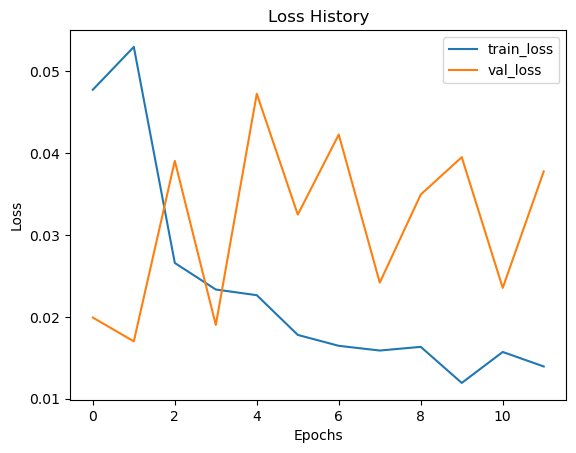

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

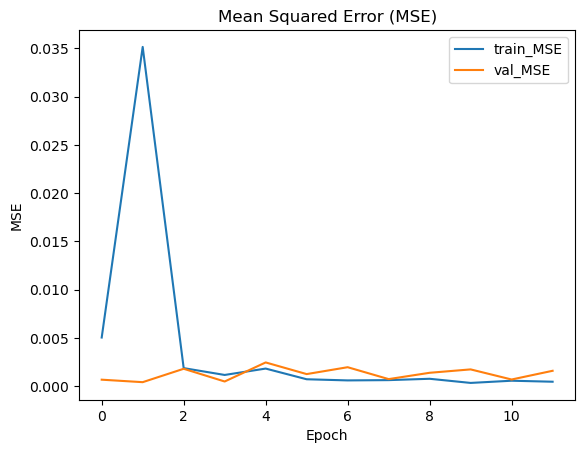

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

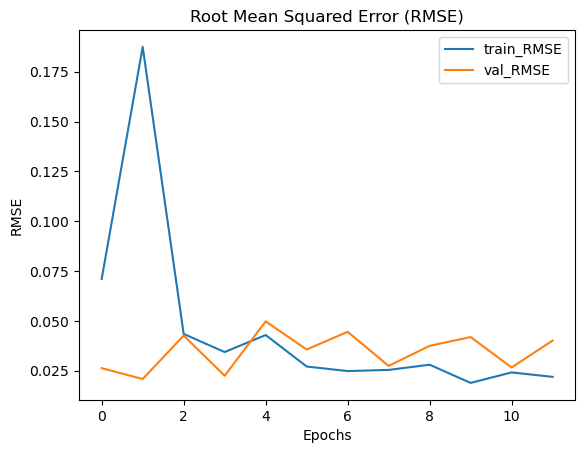

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

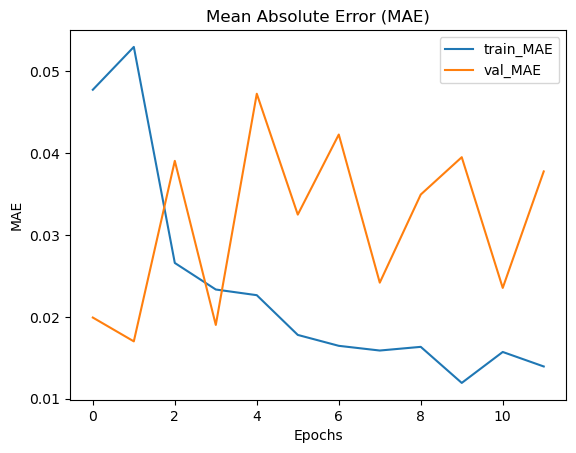

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

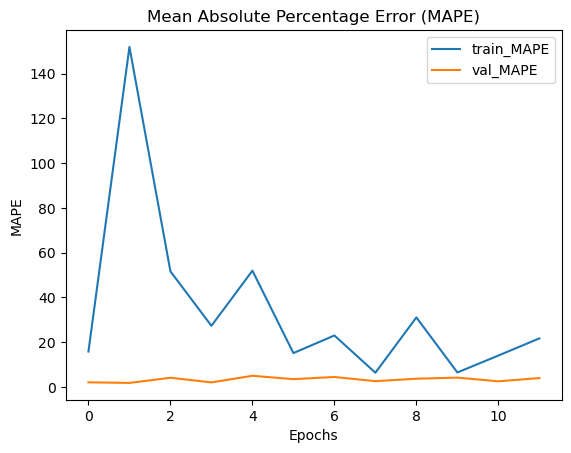

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:19:24.006850: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


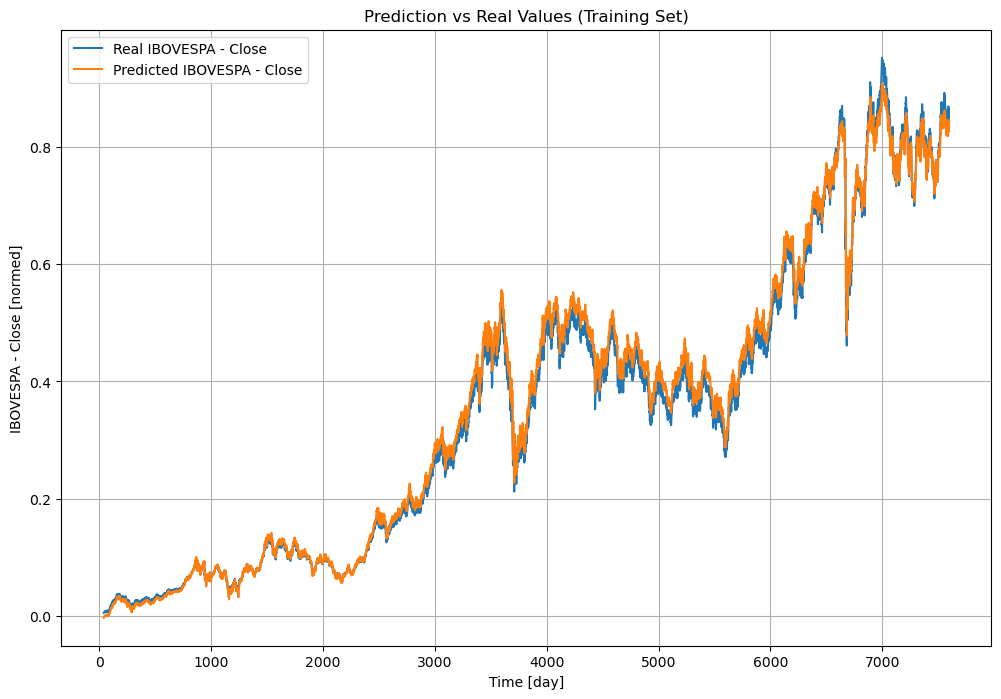

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


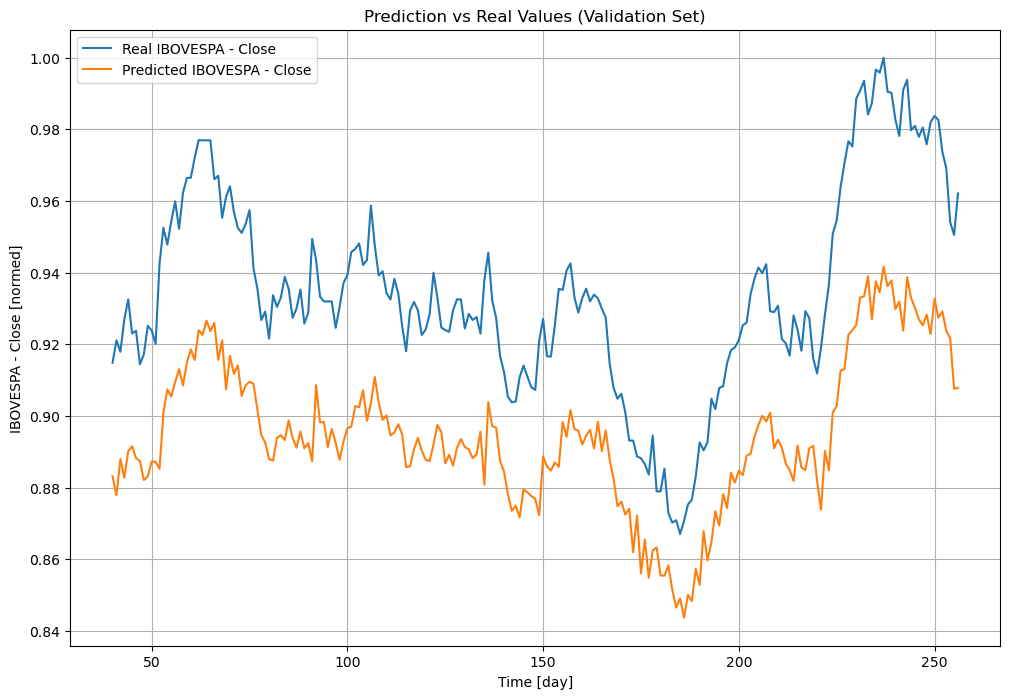

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


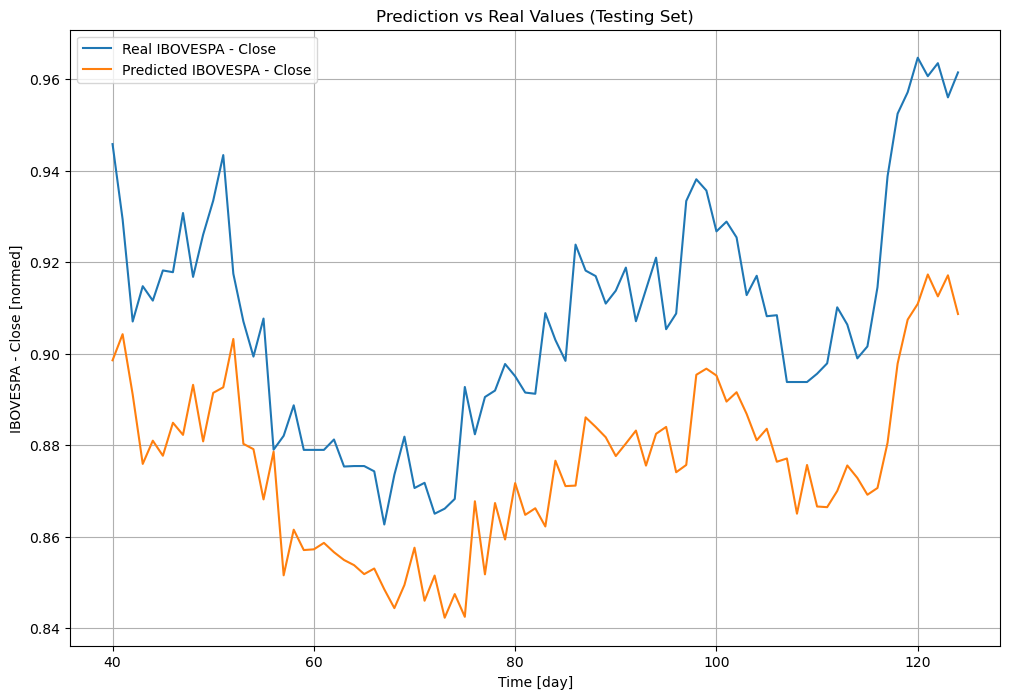

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

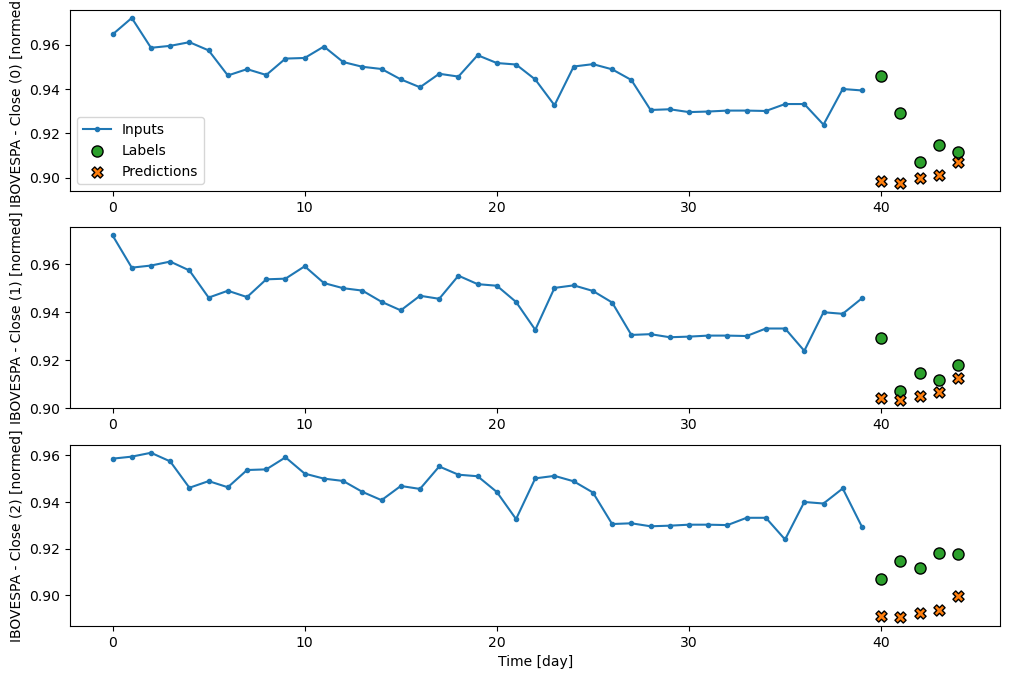

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:11s:382ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[[0.8985503 , 0.8985503 , 0.8985503 , ..., 0.8985503 ,
         0.8985503 , 0.8985503 ],
        [0.8977472 , 0.8977472 , 0.8977472 , ..., 0.8977472 ,
         0.8977472 , 0.8977472 ],
        [0.89967084, 0.89967084, 0.89967084, ..., 0.89967084,
         0.89967084, 0.89967084],
        [0.90105164, 0.90105164, 0.90105164, ..., 0.90105164,
         0.90105164, 0.90105164],
        [0.907034  , 0.907034  , 0.907034  , ..., 0.907034  ,
         0.9070342 , 0.9070342 ]],

       [[0.90425956, 0.90425956, 0.90425956, ..., 0.90425956,
         0.90425956, 0.90425956],
        [0.90338147, 0.90338147, 0.90338147, ..., 0.90338147,
         0.90338147, 0.90338147],
        [0.90519977, 0.90519977, 0.90519977, ..., 0.90519977,
         0.90519977, 0.90519977],
        [0.9067136 , 0.9067136 , 0.9067136 , ..., 0.9067136 ,
         0.9067136 , 0.9067136 ],
        [0.91268766, 0.91268766, 0.91268766, ..., 0.91268766,
         0.9126878 , 0.9126878 ]],

       [[0.89107454, 0.89107454, 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')